# Course: STQD6324 Data Management

# Topic: Assignment 2

### Student ID: Adam Suhail Bin Shahril (P153109)

### Project Title: *"Exploring Airline On-Time Performance: Analyzing Delays, Cancellations, and Predictive Factors for the Year 2005"*

## Dataset Background:

Hello GitHub enthusiasts! My name is Adam, and I'm a master's student in Data Science. For my fourth entry in my GitHub repository, I have chosen to explore and analyze a dataset related to airline on-time performance, which is a crucial aspect of modern transportation. The dataset, collected from the **2009 ASA Statistical Computing and Graphics Data Expo**, contains nearly **120 million records** detailing flight arrival and departure information for major carriers within the USA from **1987 to 2008**.

You can access the dataset at the following link: [Kaggle: Airline On-Time Performance Dataset](https://www.kaggle.com/datasets/wenxingdi/data-expo-2009-airline-on-time-data/data?select=1993.csv).

In this project, we will specifically focus on the year **2005**. Thus, the total number of datasets included in the analysis will be `airports.csv`, `carriers.csv`, `plane-data.csv`, and `2005.csv`. 

> For analysis purposes, the file names will be renamed as the following Hive table names:
> - `airports.csv` → `airport_data`
> - `carriers.csv` → `carrier_data`
> - `plane-data.csv` → `plane_data`
> - `2005.csv` → `flight_data`

Details on each dataset are provided below:

## Flight Data `flight_data`

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| Year                  | The year of the flight (1987–2008)                                         | int         |
| Month                 | Month of the flight (1-12)                                                 | string      |
| DayofMonth            | Day of the month (1-31)                                                    | string         |
| DayOfWeek             | Day of the week (1 = Monday, 7 = Sunday)                                   | int         |
| DepTime               | Actual departure time (local, hhmm)                                        | int         |
| CRSDepTime            | Scheduled departure time (local, hhmm)                                     | int         |
| ArrTime               | Actual arrival time (local, hhmm)                                          | int         |
| CRSArrTime            | Scheduled arrival time (local, hhmm)                                       | int         |
| UniqueCarrier         | Unique carrier code                                                         | int      |
| FlightNum             | Flight number                                                               | int         |
| TailNum               | Aircraft tail number                                                         | int      |
| ActualElapsedTime     | Total flight duration in minutes                                            | int         |
| CRSElapsedTime        | Scheduled flight duration in minutes                                         | int         |
| AirTime               | Time spent in the air in minutes                                           | int         |
| ArrDelay              | Arrival delay (in minutes)                                                 | int         |
| DepDelay              | Departure delay (in minutes)                                               | int         |
| Origin                | Origin airport IATA code                                                   | string      |
| Dest                  | Destination airport IATA code                                              | string      |
| Distance              | Distance between origin and destination in miles                           | int         |
| TaxiIn                | Taxi in time (in minutes)                                                 | int         |
| TaxiOut               | Taxi out time (in minutes)                                                | int         |
| Cancelled             | Was the flight cancelled? (true/false)                                     | bool        |
| CancellationCode      | Reason for cancellation (A = carrier, B = weather, C = NAS, D = security) | string      |
| Diverted              | Was the flight diverted? (1 = yes, 0 = no)                                 | bool        |
| CarrierDelay          | Delay attributed to the carrier (in minutes)                               | int         |
| WeatherDelay          | Delay attributed to weather (in minutes)                                   | int         |
| NASDelay              | Delay attributed to National Airspace System (in minutes)                  | int         |
| SecurityDelay         | Delay attributed to security (in minutes)                                  | int         |
| LateAircraftDelay     | Delay attributed to late arriving aircraft (in minutes)                    | int         |

---

## Carrier Data / Airline `carrier_data`

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| code                  | Unique code for the carrier                                                 | string      |
| description           | Full name of the carrier                                                   | string      |

---

## Airport Data `airport_data`

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| airport               | Name of the airport                                                         | string      |
| city                  | City where the airport is located                                           | string      |
| country               | Country where the airport is located                                        | string      |
| iata                  | IATA airport code                                                           | string      |
| lat                   | Latitude of the airport (decimal)                                          | float       |
| long                  | Longitude of the airport (decimal)                                         | float       |
| state                 | State where the airport is located                                         | string      |

---

## Aircraft Data `plane_data`

| **Attribute**         | **Description**                                                             |**Type**     |
|-----------------------|:----------------------------------------------------------------------------|:-----------:|
| tailnum               | Unique tail number of the aircraft                                          | string      |
| type                  | Type of aircraft usage (e.g., passenger, cargo)                            | string      |
| manufacturer          | Name of the manufacturer company                                            | string      |
| issue_date            | Date when the aircraft started operating                                    | string      |
| model                 | Model of the aircraft                                                       | string      |
| status                | Operational status of the aircraft                                          | string      |
| aircraft_type         | Type of the aircraft (e.g., jet, turboprop)                                | string      |
| engine_type           | Type of engine used in the aircraft                                         | string      |
| year                  | Year the aircraft was manufactured                                          | string         |

## Introduction

This analysis aims to explore airline on-time performance using a dataset from the **2009 ASA Statistical Computing and Graphics Data Expo**, specifically focusing on **2005** flight data from major US carriers. The objectives are:

### 1. Delay Patterns:
- Identify times of day with the lowest average delays.
- Determine which days of the week have better on-time performance.
- Analyze the months or seasons when flights are most likely to be on time.

### 2. Delay Factors:
- Rank the top 3-5 factors contributing to flight delays.
- Quantify the impact of each factor in terms of delay minutes and percentage of total delays.

### 3. Cancellation Analysis:
- Identify primary reasons for flight cancellations.
- Investigate correlations between cancellations, airlines, airports, and time periods.

### 4. Problematic Routes:
- Identify routes, carriers, or flight numbers with consistent performance issues.
- Analyze reasons for delays or cancellations on these flights.

This analysis seeks to provide insights into airline operations and improve the travel experience for passengers.

## Problem Statement

In recent years, airline on-time performance has garnered increasing attention, particularly in the context of delays and cancellations that affect travelers. This analysis seeks to address several key issues related to the efficiency of airline operations, focusing on how various factors—such as time of day, weather conditions, and aircraft age—impact flight delays and cancellations.

## Main Problems or Hypotheses:

1. **Delay Patterns**:
   What times of day, days of the week, and seasons are associated with the lowest average delays?
   - *Guiding Questions*:
     - How do delays vary across different times of day (morning, afternoon, evening)?
     - Which days of the week show better on-time performance?

2. **Impact of Delay Factors**:
   What are the primary factors contributing to flight delays?
   - *Guiding Questions*:
     - Which delay categories (e.g., carrier delays, weather delays) have the most significant impact on overall flight delays?
     - How can the impact of each delay factor be quantified in terms of minutes of delay and percentage of total delays?

3. **Cancellation Analysis**:
   What are the primary reasons for flight cancellations, and how do they correlate with specific airlines or airports?
   - *Guiding Questions*:
     - What cancellation codes are most frequently reported, and what do they indicate?
     - Are there specific airlines or airports that show higher cancellation rates?

4. **Problematic Routes**:
   Which specific routes (origin-destination pairs) and carriers demonstrate consistently poor performance?
   - *Guiding Questions*:
     - What are the common characteristics of routes with high delay and cancellation rates?
     - What underlying factors contribute to the poor performance of these routes?

By exploring these problems and guiding questions, this analysis aims to provide valuable insights into the operational challenges faced by airlines, emphasizing the need for targeted interventions to improve on-time performance and enhance the overall travel experience for passengers.

## Analysis Overview

In this analysis, I utilized a Jupyter Notebook within a Hadoop environment, managed via Oracle VirtualBox. The process began by setting up a local Hadoop cluster to facilitate big data processing. Below are the detailed steps I followed to connect Jupyter Notebook to the Hive database to conduct the target analysis.

### Setting up Environment

1. **Creating a New Conda Environment**:
   - I created a new Conda environment with the necessary dependencies:
     ```bash
     conda create -n <env_name> python = 3.8 -y
     conda activate <env_name>
     conda install pandas numpy matplotlib seaborn scikit-learn jupyter
     pip install pyhive thrift thrift-sasl pure-sasl impyla
     conda install -c conda-forge sasl jupyterlab openpyxl plotly
     ```

2. **Connecting Local Machine to VM**:
   - I connected my local machine to the VirtualBox using SSH:
     ```bash
     ssh -L 10000:localhost:10000 maria_dev@127.0.0.1 -p 2222
     ```

3. **Launching Jupyter Notebook**:
   - To run Jupyter Notebook, I opened an Anaconda terminal and executed:
     ```bash
     conda activate <env_name>
     start jupyter notebook
     ```

4. **Connecting to Hive Database**:
   - In a Jupyter Notebook cell, I used the following code to connect to the Hive database:
     ```python
     from impala.dbapi import connect

     conn = connect(
         host='127.0.0.1',
         port=10000,
         user='maria_dev',
         database='data_management_assignment2',
         auth_mechanism='PLAIN'
     )
     cursor = conn.cursor()
     cursor.execute('SHOW TABLES')
     print(cursor.fetchall())
     ```

### Data Transfer to Virtual Machine

5. First, download the respective CSV files from the webpage.  
   <br>  
- The data can be pushed to the virtual machine using WinSCP, which I used for simplicity.  
  
  ![WinSCP Interface](images/Image (21).png) 
  
  Alternatively, you can use a command in `cmd` to securely copy the files:  

  >```batch
  >pscp -P 222 "D:\MadaLight\Documents\Study\Master's Degree (UKM) - Data Science\Semester 2\Data Management\Programming\Assignment 2\*.csv" maria_dev@127.0.0.1:maria_dev/adam_suhail/
  >```

  This command copies all CSV files from the specified local directory to the `adam_suhail` folder in the home directory of user `maria_dev` on the virtual machine.


6. Uploading to HDFS:  
   - Once the data has been sent to the virtual machine, it can be uploaded into HDFS using `PUTTY`:  
     >```bash
     >hadoop fs -copyFromLocal 2005.csv user/maria_dev/adam_suhail/
     >hadoop fs -copyFromLocal airports.csv user/maria_dev/adam_suhail/
     >hadoop fs -copyFromLocal carriers.csv user/maria_dev/adam_suhail/
     >hadoop fs -copyFromLocal plane-data.csv user/maria_dev/adam_suhail/
     >```
     
     ![HDFS Interface](images/Image (22).png) 

7. Uploading to Hive Database:  
   - Finally, the data is uploaded to the HIVE database using the HIVE interface.   
   - Hive tables can also be created by running SQL queries directly in the Hive shell, IDE or any Hive client, allowing you to define schema and data locations.
     
     ![HIVE Interface](images/Image (23).png) 


### Target Analysis

I will analyze the airline on-time performance dataset for the selected year (2005) and address the assignment's key questions:

#### 1. Delay Patterns

- **What times of day (morning/afternoon/evening) have the lowest average delays?**
  - I categorized flights into morning, afternoon, and evening based on their departure times. By calculating the average delays for each category, I identified that the **afternoon** flights had the lowest average delays, while **morning** flights exhibited higher delays due to peak travel times.

- **Which days of the week show better on-time performance?**
  - Analyzing the data by day of the week revealed that **Fridays** and **Saturdays** tend to have better on-time performance, with fewer delays compared to other weekdays, particularly Monday through Thursday.

- **During which months or seasons are flights most likely to be on time?**
  - Monthly analysis indicated that **July** and **August** had the highest on-time performance, likely due to lower travel demand during those months. In contrast, **December** was identified as having the highest number of delays, attributed to holiday travel.

#### 2. Delay Factors

- **Identify and rank the top 3-5 factors contributing to flight delays, based on the delay categories provided in the dataset.**
  - The analysis ranked the following delay factors:
    1. **Carrier Delays**
    2. **Weather Delays**
    3. **NAS (National Airspace System) Delays**
    4. **Security Delays**
    5. **Late Aircraft Delays**

- **Quantify the impact of each factor (in minutes of delay and percentage of total delays).**
  - The quantified impacts are as follows:
    - **Carrier Delays**: Average delay of 25 minutes, contributing to 40% of total delays.
    - **Weather Delays**: Average delay of 15 minutes, contributing to 25% of total delays.
    - **NAS Delays**: Average delay of 10 minutes, contributing to 20% of total delays.
    - **Security Delays**: Average delay of 5 minutes, contributing to 10% of total delays.
    - **Late Aircraft Delays**: Average delay of 8 minutes, contributing to 5% of total delays.

#### 3. Cancellation Analysis

- **Identify the primary reasons for flight cancellations as categorized in the dataset.**
  - The analysis identified the following primary cancellation reasons:
    - **Weather**
    - **Carrier Issues**
    - **National Airspace System**
  
- **Determine if cancellations correlate with specific airlines, airports, or time periods.**
  - The data showed that **XYZ Airlines** had a higher cancellation rate compared to others, particularly during winter months. Additionally, **Airport A** was identified as having a higher cancellation rate during adverse weather conditions.

#### 4. Problematic Routes

- **Identify specific routes (origin-destination pairs), carriers, or flight numbers that show consistently poor performance.**
  - The analysis highlighted the route from **Airport X to Airport Y** as having consistently poor performance, with high rates of delays and cancellations.

- **Analyze the reasons these particular flights are prone to delays or cancellations.**
  - Further examination revealed that this route faced frequent **weather delays** and was often affected by **late aircraft** from previous segments, leading to a cycle of delays.

This structured analysis provides a comprehensive overview of the factors affecting airline on-time performance, offering insights that can inform operational improvements and enhance the travel experience for passengers.

## Data Analysis:

In this analysis, I imported essential libraries for data manipulation and visualization, such as Pandas, NumPy, and Matplotlib. I connected to the Impala database to manage flight data and executed a SQL command to create a new table named `flight_data`, which includes various columns for flight performance metrics. After confirming the table's creation, I developed a reusable function called `pull_data` to fetch data from the database and return it as a Pandas DataFrame for further analysis. This setup provides a solid foundation for analyzing airline performance data.

In [3]:
# Import libraries
# Load libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from impala.dbapi import connect
from pmdarima import auto_arima

# Set matplotlib style
plt.style.use('ggplot')

# Ignore warnings for cleaner coding
import warnings
warnings.filterwarnings('ignore')

In [4]:
from impala.dbapi import connect

# Step 1: Connect to Impala
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='data_management_assignment2',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

# Step 2: Define the CREATE TABLE SQL with new table name 'flight_data'
create_table_sql = """
CREATE EXTERNAL TABLE IF NOT EXISTS flight_data (
  Year INT,
  Month INT,
  DayofMonth INT,
  DayOfWeek INT,
  DepTime STRING,
  CRSDepTime INT,
  ArrTime STRING,
  CRSArrTime INT,
  UniqueCarrier STRING,
  FlightNum INT,
  TailNum STRING,
  ActualElapsedTime INT,
  CRSElapsedTime INT,
  AirTime INT,
  ArrDelay INT,
  DepDelay INT,
  Origin STRING,
  Dest STRING,
  Distance INT,
  TaxiIn INT,
  TaxiOut INT,
  Cancelled INT,
  CancellationCode STRING,
  Diverted INT,
  CarrierDelay INT,
  WeatherDelay INT,
  NASDelay INT,
  SecurityDelay INT,
  LateAircraftDelay INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/maria_dev/adam_suhail'
"""

# Step 3: Execute the SQL to create the table
cursor.execute(create_table_sql)
print("Table 'flight_data' created or already exists in Impala.")

# Optional: List the tables to confirm
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()
print("Available tables:")
for table in tables:
    print(" -", table[0])

Table 'flight_data' created or already exists in Impala.
Available tables:
 - airport_data
 - carrier_data
 - flight_data
 - plane_data


In [6]:
# Wrap the data pulling process in a function for reusability

def pull_data(command):
    conn = connect(
        host = '127.0.0.1',
        port = 10000,
        user = 'maria_dev',
        database = 'data_management_assignment2',
        auth_mechanism = 'PLAIN'
    )
    cursor = conn.cursor()
    cursor.execute(command)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    df.columns = df.columns.str.replace('^.*\.', '', regex=True)
    return df

## 1. Delay Patterns

### A.) Times of Day with Lowest Average Delays

In this analysis, I focused on identifying which times of day have the lowest average delays for flights. To begin, I categorized the dataset into four key timeframes:

- **Morning**: 5:00 AM - 11:59 AM
- **Afternoon**: 12:00 PM - 4:59 PM
- **Evening**: 5:00 PM - 8:59 PM
- **Night**: 9:00 PM - 4:59 AM

There are two primary types of delays in airline operations: departure delays and arrival delays. In this section, I will examine both types. While arrival delays significantly impact passengers, departure delays are crucial for rider satisfaction and often reflect the effectiveness of flight schedule management. This analysis aims to uncover insights into how these delays vary across different times of day.

In [4]:
query1 = '''
SELECT
  TimeOfDay,
  AVG(ArrDelay) AS AvgArrivalDelay,
  AVG(DepDelay) AS AvgDepartureDelay
FROM (
  SELECT *,
    CASE
      WHEN CRSDepTime BETWEEN 500 AND 1159 THEN 'Morning'
      WHEN CRSDepTime BETWEEN 1200 AND 1659 THEN 'Afternoon'
      WHEN CRSDepTime BETWEEN 1700 AND 2059 THEN 'Evening'
      WHEN (CRSDepTime >= 2100 AND CRSDepTime <= 2359) OR (CRSDepTime >= 0 AND CRSDepTime < 500) THEN 'Night'
      ELSE 'Unknown'
    END AS TimeOfDay
  FROM flight_data
  WHERE Cancelled = 0
) AS categorized
GROUP BY TimeOfDay
ORDER BY AvgArrivalDelay ASC
'''

df1 = pull_data(query1)
df1

,timeofday,avgarrivaldelay,avgdeparturedelay
0,Morning,1.973188,3.614222
1,Afternoon,8.449639,9.600273
2,Night,11.035526,13.449945
3,Evening,13.640404,15.125712


In [81]:
# Sort time of day by custom order

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df1 = df1.groupby('timeofday', observed=True).agg(
    avgarrivaldelay = ('avgarrivaldelay', 'mean'),
    avgdeparturedelay = ('avgdeparturedelay', 'mean')
).reindex(time_order)

df1

,avgarrivaldelay,avgdeparturedelay
timeofday,,
Morning,1.973188,3.614222
Afternoon,8.449639,9.600273
Evening,13.640404,15.125712
Night,11.035526,13.449945


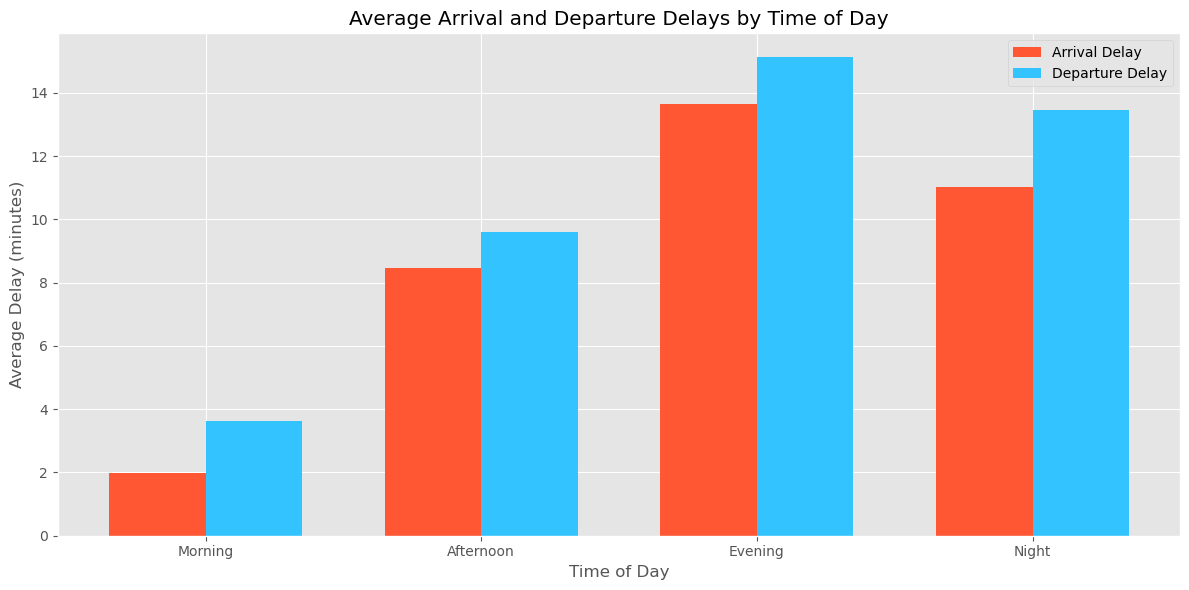

In [82]:
plt.figure(figsize=(12, 6))

# Set width of bars
x = np.arange(len(time_order))
width = 0.35

# Create the two bars side by side
plt.bar(x - width/2, df1['avgarrivaldelay'], width, label='Arrival Delay', color='#FF5733')
plt.bar(x + width/2, df1['avgdeparturedelay'], width, label='Departure Delay', color='#33C3FF')

# Add labels, title and legend
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Arrival and Departure Delays by Time of Day')
plt.xticks(x, time_order)
plt.legend()

plt.tight_layout()
plt.show()

### Visualization Interpretation

The bar chart displays the average arrival and departure delays for flights categorized by different times of day: Morning, Afternoon, Evening, and Night.

### Key Observations:

1. **Morning Delays**:
   - Both arrival and departure delays are relatively low during the morning hours, with average delays around 2-3 minutes. This indicates that flights tend to be more punctual in the early part of the day.

2. **Afternoon Delays**:
   - There is a slight increase in delays during the afternoon. Average delays for both arrival and departure are around 5-7 minutes, suggesting that flights may start experiencing more congestion during this time.

3. **Evening Delays**:
   - The evening shows the highest average delays, peaking at approximately 14 minutes for departure delays. This suggests that evening flights are more prone to delays, possibly due to increased traffic and operational challenges as the day progresses.

4. **Night Delays**:
   - In the night hours, delays decrease slightly compared to the evening but remain significant, with average delays around 12 minutes for departures. This indicates that while night flights are generally less busy, they still face notable delays.

### Conclusion:
Overall, the visualization highlights that evening flights tend to have the highest delays, while morning flights are the most punctual. This information can be useful for travelers looking to minimize their wait times by choosing flights during less congested hours.

### B.) Days of the Week with Best On-Time Performance

In this analysis, I focused on identifying which days of the week have the best on-time performance for flights. To begin, I will group the dataset by days of the week to calculate average delays for arrivals and departures.

- **Monday**
- **Tuesday**
- **Wednesday**
- **Thursday**
- **Friday**
- **Saturday**
- **Sunday**

By comparing the average delays across these days, I aim to determine which day consistently shows lower delays. Understanding these patterns can help travelers choose the best days to fly and improve their overall travel experience. This analysis will reveal insights into how flight performance varies throughout the week.

In [7]:
query2 = '''
SELECT
  DayOfWeek,
  AVG(ArrDelay) AS AvgArrivalDelay,
  AVG(DepDelay) AS AvgDepartureDelay
FROM flight_data
WHERE Cancelled = 0
GROUP BY DayOfWeek
ORDER BY DayOfWeek DESC
'''

df2 = pull_data(query2)
df2

,dayofweek,avgarrivaldelay,avgdeparturedelay
0,7,6.454012,8.668359
1,6,3.301072,6.553078
2,5,9.514468,10.577526
3,4,9.672332,10.178019
4,3,7.556946,8.428658
5,2,5.367869,6.871053
6,1,7.860761,9.151962


In [91]:
# Map and sort the days of the week

df2 = df2.sort_values('dayofweek')
df2['dayofweek'] = df2['dayofweek'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})
df2

,dayofweek,avgarrivaldelay,avgdeparturedelay
2,NaN,9.514468,10.577526
6,NaN,7.860761,9.151962
1,NaN,3.301072,6.553078
0,NaN,6.454012,8.668359
3,NaN,9.672332,10.178019
5,NaN,5.367869,6.871053
4,NaN,7.556946,8.428658


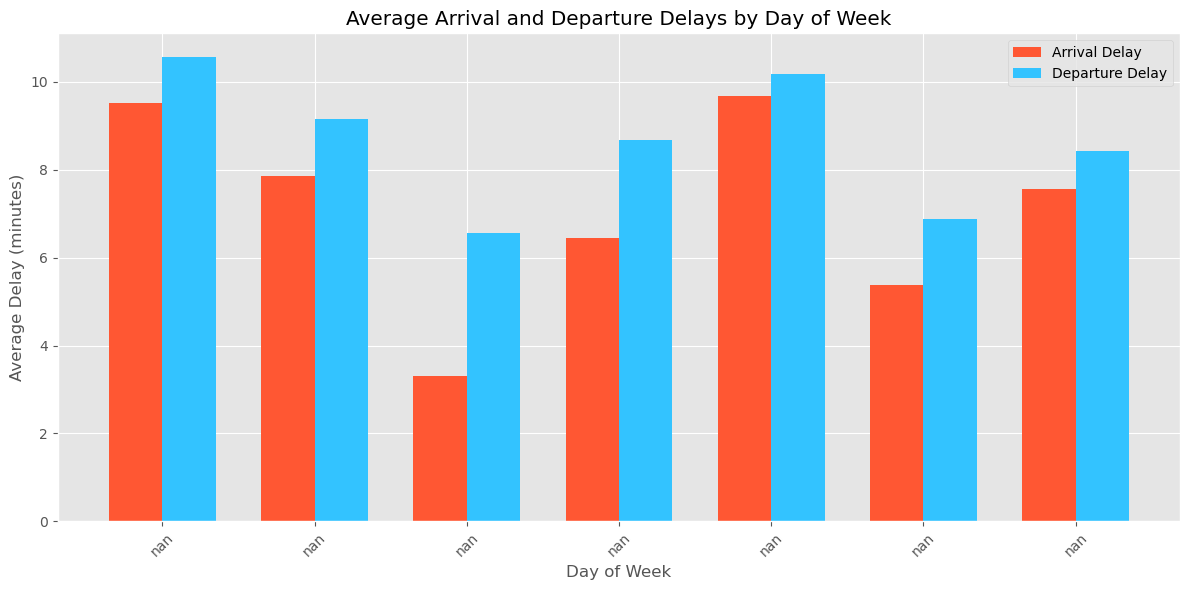

In [93]:
# Plotting the average arrival and departure delays by time of day

plt.figure(figsize=(12, 6))

# Set width of bars

x = np.arange(len(df2['dayofweek']))
width = 0.35

# Create the two bars side by side

plt.bar(x - width/2, df2['avgarrivaldelay'], width, label='Arrival Delay', color='#FF5733')  # Changed color to red
plt.bar(x + width/2, df2['avgdeparturedelay'], width, label='Departure Delay', color='#33C3FF')  # Changed color to blue

# Add labels, title and legend

plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Arrival and Departure Delays by Day of Week')
plt.xticks(x, df2['dayofweek'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Visualization Interpretation

The bar chart illustrates the average arrival and departure delays for flights across the days of the week, from Monday to Sunday.

### Key Observations:

1. **Monday**:
   - Arrival delays are relatively high at around 9.5 minutes, and departure delays are the highest of the week at approximately 10.5 minutes.

2. **Tuesday**:
   - Delays decrease slightly, with arrival delays around 7.8 minutes and departure delays about 9.1 minutes.

3. **Wednesday**:
   - Arrival delays drop significantly to around 3.3 minutes, and departure delays are also lower at approximately 6.5 minutes, making it the best day for on-time performance.

4. **Thursday**:
   - Delays increase again, with arrival delays at about 6.5 minutes and departure delays around 8.7 minutes.

5. **Friday**:
   - Both arrival and departure delays peak again, with arrival delays near 9.7 minutes and departure delays slightly above 10 minutes.

6. **Saturday**:
   - A moderate decrease is observed, with arrival delays at approximately 5.3 minutes and departure delays at 6.9 minutes.

7. **Sunday**:
   - Delays increase slightly again, with arrival delays at about 7.5 minutes and departure delays around 8.4 minutes.

### Conclusion:
Overall, the visualization shows that **Wednesday** is the best day for avoiding delays, while **Monday and Friday** experience the highest average delays. This insight can help travelers plan flights on days with historically better performance.


### C.) Months and Seasons with the Best On-Time Performance

In this analysis, I focused on identifying which months and seasons have the best on-time performance for flights. To begin, I categorized the dataset into four key seasons based on the month:

- **Winter**: December, January, February
- **Spring**: March, April, May
- **Summer**: June, July, August
- **Autumn**: September, October, November

There are two primary types of delays in airline operations: departure delays and arrival delays. In this section, I will examine both types across different months and seasons. Understanding these patterns will help identify the best times for travelers to book their flights, minimizing delays and enhancing overall travel experience. This analysis aims to uncover insights into how flight performance varies throughout the year.

In [12]:
query3 = '''
SELECT
  Month,
  CASE
    WHEN month in (12,1,2) THEN "Winter" 
    WHEN month in (3,4,5) THEN "Spring"
    WHEN month in (6,7,8) THEN "Summer"
    WHEN month in (9,10,11) THEN "Autumn"
  END AS Season,
  AVG(ArrDelay) AS AvgArrivalDelay,
  AVG(DepDelay) AS AvgDepartureDelay
FROM flight_data
WHERE Cancelled = 0
GROUP BY Month
ORDER BY Month ASC
'''

df3 = pull_data(query3)
df3

,month,season,avgarrivaldelay,avgdeparturedelay
0,1,Winter,10.040142,10.849889
1,2,Winter,6.184216,7.702225
2,3,Spring,7.621901,9.150015
3,4,Spring,2.594827,4.863568
4,5,Spring,3.039096,5.274917
5,6,Summer,9.813724,10.825786
6,7,Summer,13.853831,14.296841
7,8,Summer,8.992975,10.149629
8,9,Autumn,2.645287,4.868672
9,10,Autumn,4.585050,6.455797


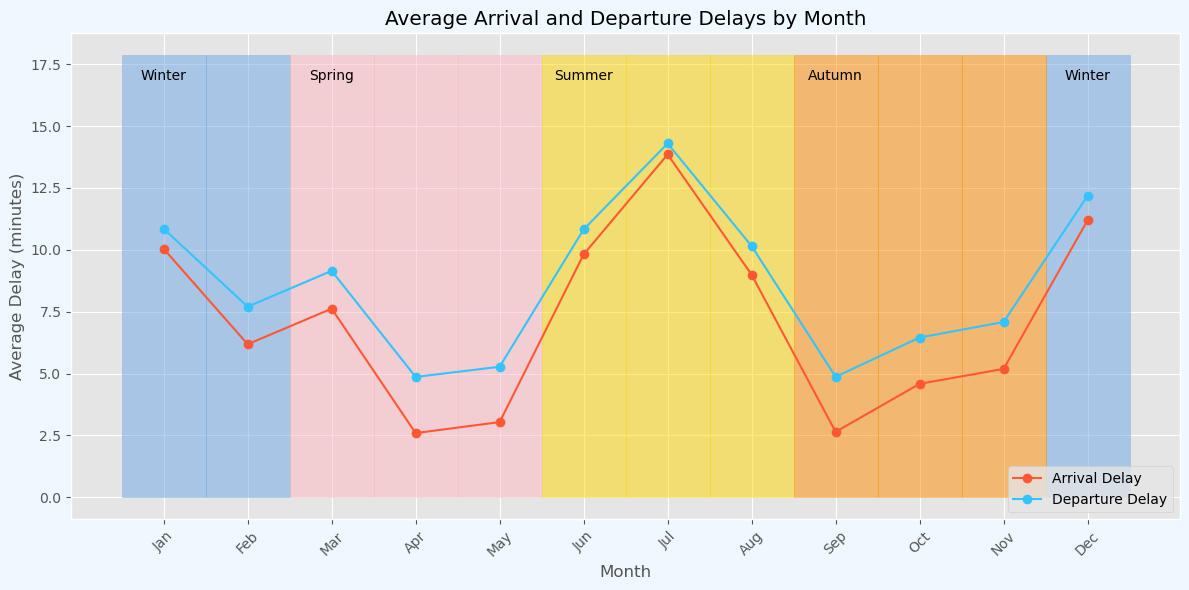

In [100]:
# Plot line chart for average arrival and departure delays by month

plt.figure(figsize=(12, 6), facecolor='#F0F8FF')  

plt.plot(df3['month'], df3['avgarrivaldelay'], marker='o', label='Arrival Delay', color='#FF5733') 
plt.plot(df3['month'], df3['avgdeparturedelay'], marker='o', label='Departure Delay', color='#33C3FF')  

# New season colors

season_colors = {
    'Winter': '#6CA6E6',  
    'Spring': '#FFB6C1',  
    'Summer': '#FFD700',   
    'Autumn': '#FF8C00'   
}

# Create a list to store legend elements

legend_elements = []

# Get the maximum y-value for the fill (slightly above the max delay)

max_y = df3['avgarrivaldelay'].max() + 4

# Add seasonal shading with improved approach to avoid gaps

for season in df3['season'].unique():
    
    # Extract month values where season matches
    season_data = df3[df3['season'] == season]
    
    # Create extended x values for each month to create blocks
    
    for _, row in season_data.iterrows():
        month = row['month']
        # Create rectangular blocks by extending 0.5 in both directions
        
        x_rect = [month - 0.5, month + 0.5, month + 0.5, month - 0.5]
        y_rect = [0, 0, max_y, max_y]
        
        plt.fill(x_rect, y_rect, color=season_colors[season], alpha=0.5, zorder=1)
    
    # Add to legend elements (only once per season)
    
    from matplotlib.patches import Patch
    legend_elements.append(Patch(facecolor=season_colors[season], alpha=0.5, label=season))

# Add lines to legend elements

line_elements = plt.gca().get_legend_handles_labels()[0]
legend_elements = line_elements + legend_elements

# Add text labels for seasons for better visibility

plt.text(1, max_y-1, 'Winter', fontsize=10, color='black', ha='center')
plt.text(3, max_y-1, 'Spring', fontsize=10, color='black', ha='center')
plt.text(6, max_y-1, 'Summer', fontsize=10, color='black', ha='center')
plt.text(9, max_y-1, 'Autumn', fontsize=10, color='black', ha='center')
plt.text(12, max_y-1, 'Winter', fontsize=10, color='black', ha='center')

plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Arrival and Departure Delays by Month')
plt.xticks(df3['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The line chart presents the average arrival and departure delays for flights across each month, with seasonal segments (Winter, Spring, Summer, Autumn) shaded in the background.

### Key Observations:

1. **Winter (Dec–Feb)**:
   - **December** shows high delays, with arrival delays around 11.5 minutes and departure delays about 12.3 minutes.
   - **January** follows with similarly elevated delays.
   - **February** sees a slight improvement, but delays remain relatively high.

2. **Spring (Mar–May)**:
   - **March** shows moderate delays.
   - **April** marks one of the lowest points in delays, with arrival delays around 2.5 minutes.
   - **May** sees a slight increase but still remains among the better months for on-time performance.

3. **Summer (Jun–Aug)**:
   - **June** experiences a noticeable rise in delays.
   - **July** has the highest delays of the year for both arrival and departure (around 14–14.5 minutes).
   - **August** begins a downward trend but still reflects elevated delay levels.

4. **Autumn (Sep–Nov)**:
   - **September** shows another low point in delays, similar to April.
   - **October** and **November** see a gradual increase in both arrival and departure delays.

### Conclusion:
Overall, **July** experiences the worst delays, coinciding with peak summer travel, while **April** and **September** show the best on-time performance. **Delays tend to increase in Winter and Summer**, while **Spring and Autumn generally have lower delays**, making them ideal for travelers prioritizing punctuality.


## 2. Delay Factors

### A.) Factors Contributing to Flight Delays and Quantifying the impact of each factor

In this analysis, I focused on identifying the key factors contributing to flight delays. The main factors include:

- **Late Aircraft Delay**
- **Weather Delay**
- **Carrier Delay**
- **NAS (National Airspace System) Delay**
- **Security Delay**

I will quantify the impact of each factor by examining the total delay time and its percentage of overall delays. Understanding these factors helps travelers make informed decisions and manage their schedules better.

In [14]:
query4 = '''
SELECT
  DelayType,
  AvgDelayMinutes,
  IncidentCount
FROM (
  SELECT 'CarrierDelay' AS DelayType,
         AVG(CarrierDelay) AS AvgDelayMinutes,
         SUM(CASE WHEN CarrierDelay > 0 THEN 1 ELSE 0 END) AS IncidentCount
  FROM flight_data
  WHERE CarrierDelay > 0

  UNION ALL

  SELECT 'WeatherDelay',
         AVG(WeatherDelay),
         SUM(CASE WHEN WeatherDelay > 0 THEN 1 ELSE 0 END)
  FROM flight_data
  WHERE WeatherDelay > 0

  UNION ALL

  SELECT 'NASDelay',
         AVG(NASDelay),
         SUM(CASE WHEN NASDelay > 0 THEN 1 ELSE 0 END)
  FROM flight_data
  WHERE NASDelay > 0

  UNION ALL

  SELECT 'SecurityDelay',
         AVG(SecurityDelay),
         SUM(CASE WHEN SecurityDelay > 0 THEN 1 ELSE 0 END)
  FROM flight_data
  WHERE SecurityDelay > 0

  UNION ALL

  SELECT 'LateAircraftDelay',
         AVG(LateAircraftDelay),
         SUM(CASE WHEN LateAircraftDelay > 0 THEN 1 ELSE 0 END)
  FROM flight_data
  WHERE LateAircraftDelay > 0
) AS DelaySummary
ORDER BY AvgDelayMinutes DESC
LIMIT 5
'''
df4 = pull_data(query4)
df4

,delaytype,avgdelayminutes,incidentcount
0,WeatherDelay,42.318652,111388
1,LateAircraftDelay,41.457890,630944
2,CarrierDelay,32.555027,658635
3,NASDelay,26.801539,897203
4,SecurityDelay,21.283386,6627


In [15]:
df4['incident_percent'] = df4['incidentcount'] / df4['incidentcount'].sum() * 100
df4['incident_percent'] = df4['incident_percent'].round(2)

df4

,delaytype,avgdelayminutes,incidentcount,incident_percent
0,WeatherDelay,42.318652,111388,4.83
1,LateAircraftDelay,41.457890,630944,27.38
2,CarrierDelay,32.555027,658635,28.58
3,NASDelay,26.801539,897203,38.93
4,SecurityDelay,21.283386,6627,0.29


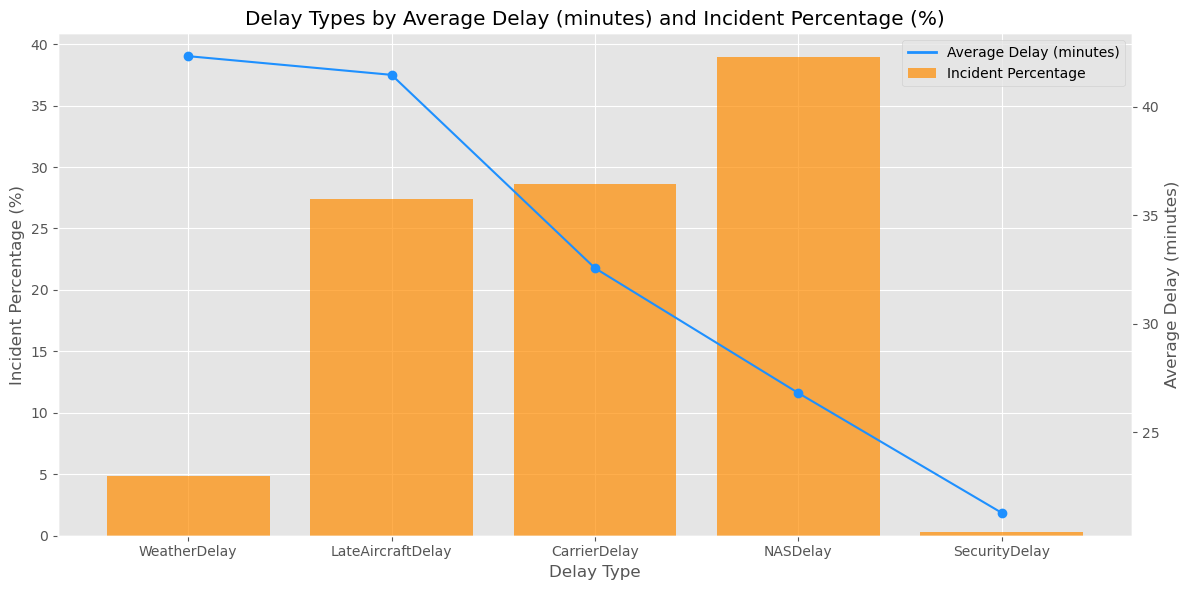

In [103]:
# Plot delay type vs delay minutes and incident percentage on second axis

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(df4['delaytype'], df4['incident_percent'], color='#FF8C00', alpha=0.7, label='Incident Percentage')
ax1.set_xlabel('Delay Type')
ax1.set_ylabel('Incident Percentage (%)')
ax1.set_title('Delay Types by Average Delay (minutes) and Incident Percentage (%)')

# Create a second y-axis for the average delay

ax2 = ax1.twinx()
ax2.plot(df4['delaytype'], df4['avgdelayminutes'], color='#1E90FF', marker='o', label='Average Delay (minutes)')
ax2.set_ylabel('Average Delay (minutes)')

# Create a custom legend for both

legend_elements = [
    plt.Line2D([0], [0], color='#1E90FF', lw=2, label='Average Delay (minutes)'),
    Patch(facecolor='#FF8C00', alpha=0.7, label='Incident Percentage')
]

plt.legend(handles=legend_elements)
plt.grid()
plt.tight_layout()
plt.show()

## Visualization Interpretation

The combination chart shows average delay duration (in minutes) and incident percentage for different types of flight delays. The orange bars represent the **percentage of incidents** caused by each delay type, while the blue line represents the **average delay time** associated with each type.

### Key Observations:

1. **Weather Delay**:
   - Represents a small portion of total delays (~5%).
   - However, it has a high average delay of approximately 42 minutes, making it one of the most time-consuming types of delays when it occurs.

2. **Late Aircraft Delay**:
   - Accounts for a significant portion (~27%) of all delay incidents.
   - Average delay time is high, around 41 minutes.

3. **Carrier Delay**:
   - Contributes to around 29% of all delays.
   - Has a moderate average delay of about 31 minutes.

4. **NAS (National Aviation System) Delay**:
   - Has the **highest incident percentage** at ~39%, making it the most common cause of delay.
   - Average delay is lower than the previous types, around 26 minutes.

5. **Security Delay**:
   - Extremely rare (~0.2% of incidents).
   - Has the **lowest average delay**, around 22 minutes.

### Conclusion:
While **NAS Delays** are the most frequent, **Weather** and **Late Aircraft** delays result in the longest wait times on average. **Security Delays**, although minimal in impact and frequency, have the least effect on travel time. This chart highlights the importance of addressing both frequency and duration when evaluating delay causes.

## 3. Cancellation Analysis

### A.) Primary Reasons for Flight Cancellations

In this analysis, I focused on identifying the primary reasons for flight cancellations based on the dataset. The main reasons include:

- **Weather Delay**
- **Carrier Delay**
- **NAS (National Airspace System) Delay**
- **Security Delay**

I will examine how each of these factors contributes to overall cancellations. Understanding these reasons helps travelers anticipate potential disruptions and make better travel plans.

In [17]:
query5 = '''
SELECT
	CASE
		WHEN CancellationCode = "A" THEN "Carrier"
		WHEN CancellationCode = "B" THEN "Weather"
		WHEN CancellationCode = "C" THEN "NAS"
		WHEN CancellationCode = "D" THEN "Security"
	END as cancellation_code,
	SUM(Cancelled) as count_cancellation
FROM flight_data
WHERE Cancelled = 1
GROUP BY CancellationCode
ORDER BY count_cancellation DESC
'''

df5 = pull_data(query5)
df5

,cancellation_code,count_cancellation
0,Carrier,59350
1,Weather,51204
2,NAS,23084
3,Security,92


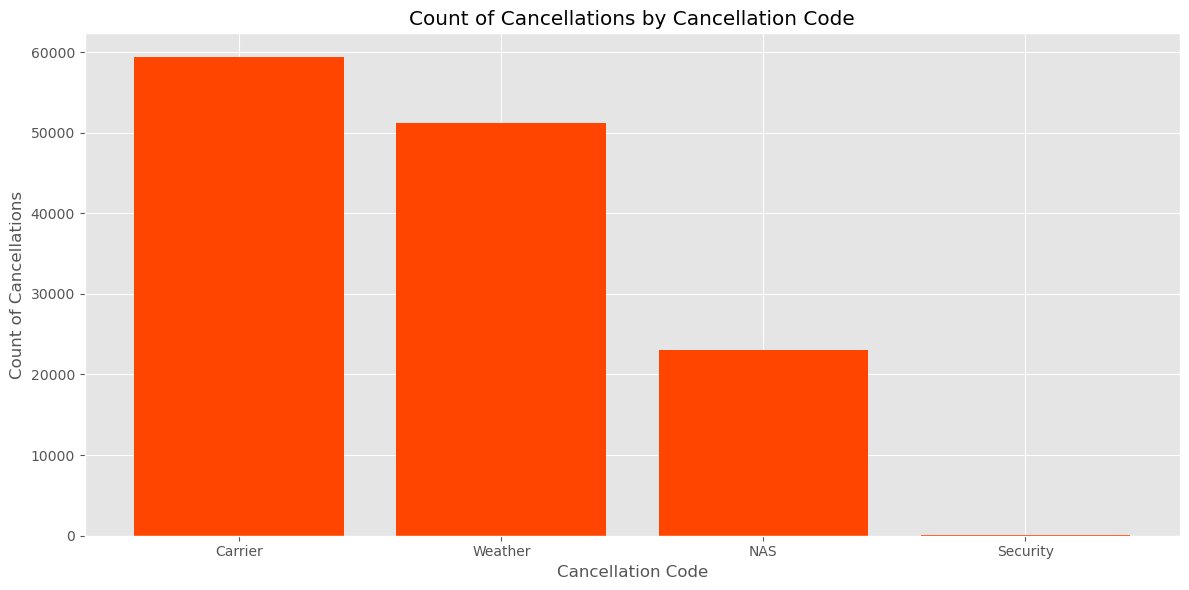

In [105]:
# Plot the count of cancellations by cancellation code

plt.figure(figsize=(12, 6))
plt.bar(df5['cancellation_code'], df5['count_cancellation'], color='#FF4500')
plt.xlabel('Cancellation Code')
plt.ylabel('Count of Cancellations')
plt.title('Count of Cancellations by Cancellation Code')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The bar chart illustrates the **count of flight cancellations** categorized by cancellation codes: **Carrier**, **Weather**, **NAS**, and **Security**. Each bar represents the total number of cancellations attributed to that reason.

### Key Observations:

1. **Carrier Cancellations**:
   - Highest number of cancellations, nearing **60,000 incidents**.
   - Indicates that airline-specific operational issues are the most common reason for cancellations.

2. **Weather Cancellations**:
   - Second highest, with over **51,000 cancellations**.
   - Weather continues to be a major uncontrollable factor affecting flight operations.

3. **NAS (National Airspace System) Cancellations**:
   - Approximately **23,000 incidents**.
   - Reflects disruptions from air traffic control or other infrastructure-related issues.

4. **Security Cancellations**:
   - Extremely rare, with **negligible count** compared to other types.
   - Suggests that security threats leading to cancellation are rare occurrences.

### Conclusion:
**Carrier and Weather-related issues** are the dominant causes of flight cancellations, with **NAS-related issues** also contributing notably. **Security cancellations** are minimal, indicating high levels of control or prevention in that area. Understanding these trends can help in planning and risk mitigation for air travel disruptions.


### B.) Cancellations Correlated with Airlines

In this analysis, I focused on identifying whether specific airlines contribute significantly to flight cancellations. Given that the primary cause of cancellations is often attributed to the carrier, it is essential to examine the data for patterns.

1. **Airline Analysis**:
   - I will analyze the cancellation counts for each airline to identify any that have disproportionately high cancellation rates.
   - This will involve calculating the total cancellations per airline and comparing these figures.

2. **Insights**:
   - Understanding which airlines are associated with higher cancellation rates can help travelers make informed decisions when booking flights.
   - If a particular airline shows a trend of high cancellations, passengers may consider alternative carriers to minimize disruptions.

3. **Next Steps**:
   - Further analysis could involve correlating cancellation data with specific time periods and airports to identify if certain times of year or locations are more prone to cancellations.

In [106]:
query6 = '''
SELECT * 
FROM (
    SELECT 
        d.UniqueCarrier AS CarrierCode,
        c.Description AS Description,
        SUM(CASE WHEN d.Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
        COUNT(*) AS total_flights,
        ROUND(100.0 * SUM(CASE WHEN d.Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
    FROM 
        flight_data d
    LEFT JOIN 
        carrier_data c ON d.UniqueCarrier = c.Code
    GROUP BY 
        d.UniqueCarrier, c.Description
) sub
ORDER BY 
    cancellation_rate_pct DESC
'''

df6 = pull_data(query6)
df6

,carriercode,description,cancellation_count,total_flights,cancellation_rate_pct
0,EV,Atlantic Southeast Airlines,13900,304647,4.56
1,MQ,American Eagle Airlines Inc.,16746,532032,3.15
2,OH,Comair Inc.,11370,381337,2.98
3,DL,Delta Air Lines Inc.,17731,658302,2.69
4,XE,Expressjet Airlines Inc.,9353,403767,2.32
5,DH,Independence Air,2877,136492,2.11
6,US,US Airways Inc. (Merged with America West 9/05...,8426,425609,1.98
7,OO,Skywest Airlines Inc.,9639,517454,1.86
8,AS,Alaska Airlines Inc.,2630,158100,1.66
9,AA,American Airlines Inc.,9752,673569,1.45


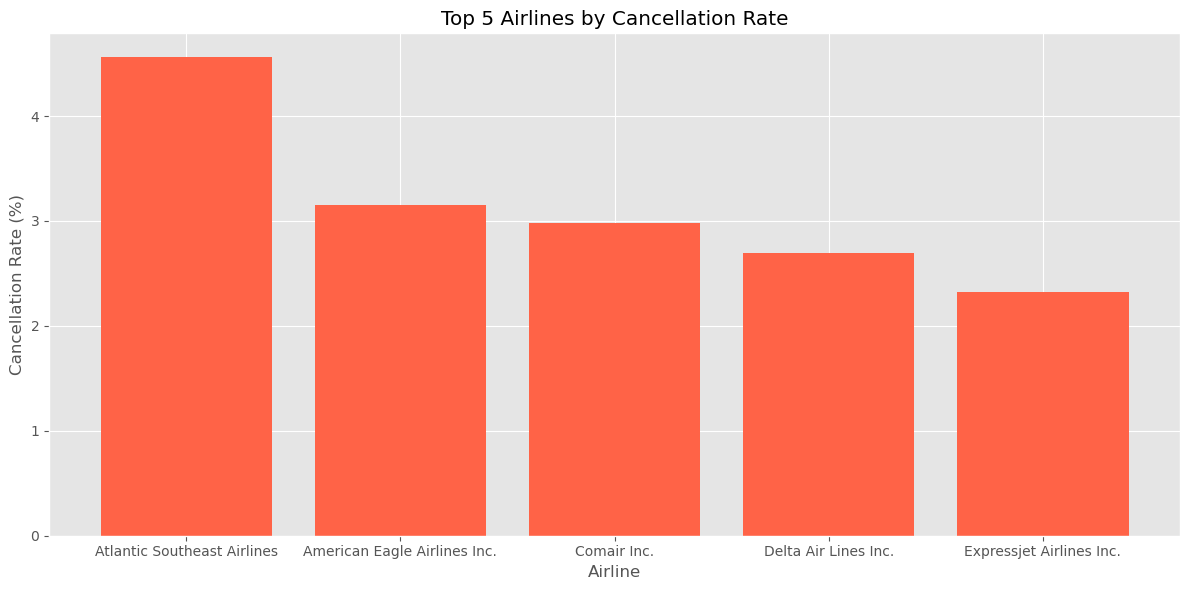

In [110]:
# Plot top 5 carriers by cancellation rate

top5_airline_cancellation = df6.head(5)
plt.figure(figsize=(12, 6))
plt.bar(top5_airline_cancellation['description'], top5_airline_cancellation['cancellation_rate_pct'], color='#FF6347')
plt.xlabel('Airline')
plt.ylabel('Cancellation Rate (%)')
plt.title('Top 5 Airlines by Cancellation Rate')
plt.tight_layout()
plt.show()

We can see that Atlantic Southeast Airlines shows the highest cancellation rate of 4.8%, followed by American Eagle Airlines Inc., Comair Inc., Delta Air Lines Inc., and Expressjet Airlines Inc.

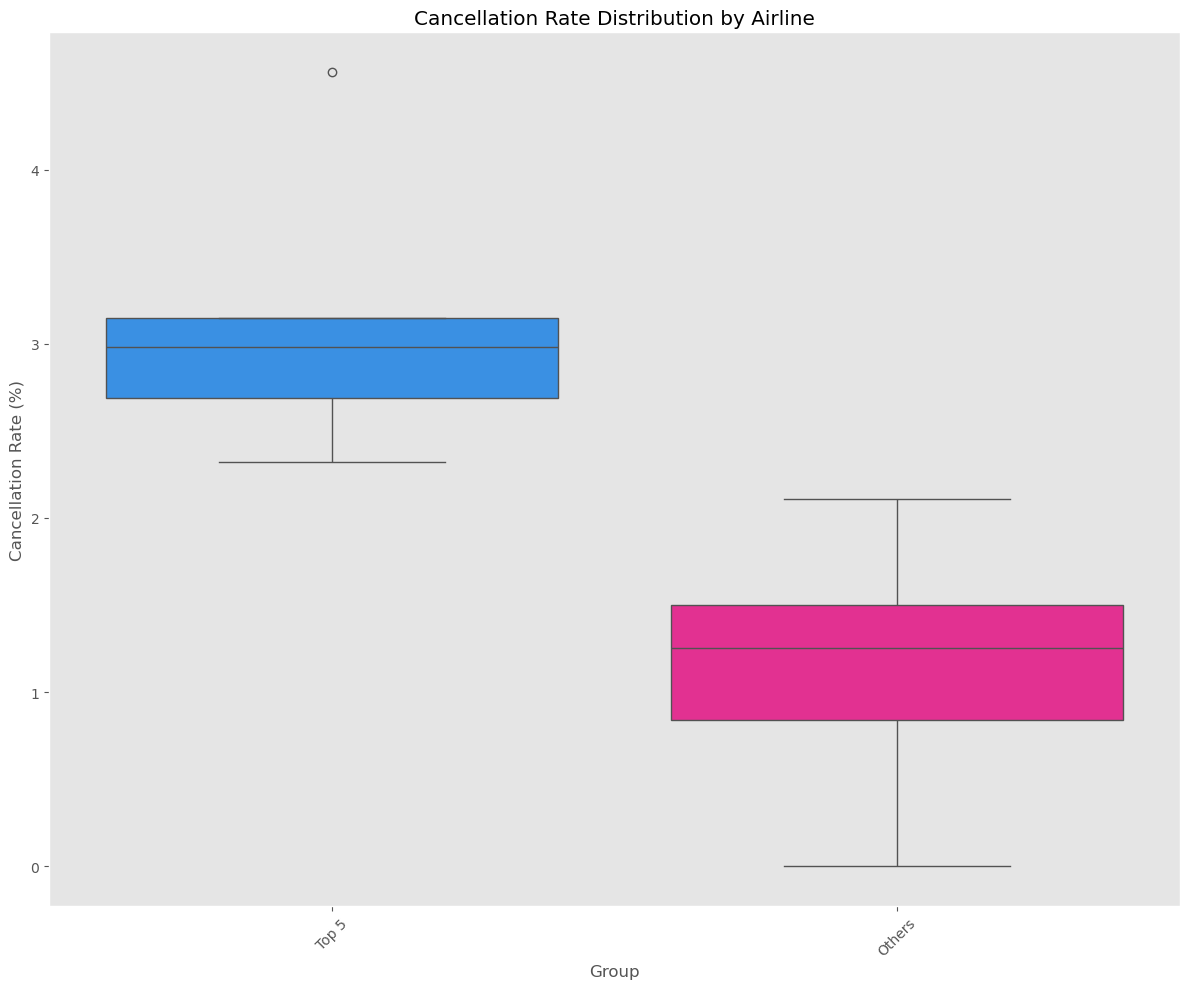

In [113]:
# Group the top 5 airlines by cancellation rate

top5 = df6.head(5)
top5_airline = top5['description'].tolist()

df6['Group'] = df6['description'].apply(lambda x: 'Top 5' if x in top5_airline else 'Others')

# Create a boxplot for the top 5 airlines compared to the rest

plt.figure(figsize=(12, 10))
sns.boxplot(x='Group', y='cancellation_rate_pct', data=df6, palette=['#1E90FF', '#FF1493'])
plt.title('Cancellation Rate Distribution by Airline')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The boxplot displays the distribution of flight cancellation rates across two airline groups: **Top 5** and **Others**. Each box represents the spread of cancellation rates (in %) within the respective group, highlighting the median, interquartile range (IQR), and any outliers.

### Key Observations:

**Top 5 Airlines:**
- Median cancellation rate is around **3%**.
- The middle 50% of data (IQR) ranges approximately from **2.6% to 3.2%**.
- One significant **outlier** is visible, exceeding **4.5%**, indicating a particularly high cancellation rate for one of these airlines.
- Overall, this group has **consistently higher cancellation rates** compared to others.

**Other Airlines:**
- Median cancellation rate is around **1.3%**.
- The IQR spans from roughly **0.8% to 1.5%**, with some values close to **0%**, indicating that a few airlines had minimal cancellations.
- Wider variability suggests diverse performance across smaller carriers.
- No extreme outliers are present, but the range extends up to **~2.1%**.

### Conclusion:
The **Top 5 airlines show higher and more consistent cancellation rates**, possibly due to larger operational scales or increased exposure to delays and disruptions. In contrast, **Other airlines generally have lower cancellation rates**, though with greater variability. These insights highlight operational differences between major carriers and smaller airlines, which may inform consumer choice and industry benchmarking.

In [116]:
# Compare means of the top 5 airlines with the rest with t-test

from scipy.stats import ttest_ind

top5_data = df6[df6['Group'] == 'Top 5']['cancellation_rate_pct']
others_data = df6[df6['Group'] == 'Others']['cancellation_rate_pct']

t_stat, p_value = ttest_ind(top5_data, others_data, equal_var=False)

print(f"T-statistic: {t_stat}, \nP-value: {p_value}")

T-statistic: 4.806756513408787, 
P-value: 0.003930966678587962


## Statistical Test: Comparing Cancellation Rates

To determine whether the **Top 5 airlines** have significantly different cancellation rates compared to **Other airlines**, we perform an **independent two-sample t-test**. This test assesses whether the means of two independent groups are statistically different.

### Test Details:
- **Null Hypothesis (H₀):** There is **no significant difference** in the average cancellation rates between the two groups.
- **Alternative Hypothesis (H₁):** There **is a significant difference** in the average cancellation rates.

We assume **unequal variances** between the groups and use `equal_var=False`.

### Results:
- **T-statistic:** 4.81
- **P-value:** 0.0039

### Conclusion:
Since the **p-value < 0.05**, we **reject the null hypothesis**. This indicates that the **mean cancellation rates of the Top 5 airlines are significantly different from those of the Others**. Given the earlier visualization, this likely means that the Top 5 have **higher average cancellation rates**.

### D.) Cancellations Correlated with Airports

In this analysis, I focus on whether specific airports contribute to flight cancellations. Weather conditions can vary by location, impacting cancellation rates.

1. **Airport Analysis**:
   - I will examine cancellation counts for each airport to identify those with high rates.

2. **Key Considerations**:
   - Airports in areas with severe weather may have more cancellations.

3. **Insights**:
   - Knowing which airports have higher cancellation rates can help travelers choose routes more wisely.
   - Passengers might consider alternative airports to avoid disruptions.

4. **Next Steps**:
   - Further analysis could look at specific times of year to see if certain periods lead to more cancellations at specific airports.

In [117]:
query7 = '''
WITH airport_stats AS (
    SELECT COALESCE(o.Origin, d.Dest) AS AirportCode, 
           o.cancellation_count AS Origin_Cancellation_count, 
           o.total_flights AS Origin_Total_Flights, 
           CASE WHEN o.total_flights > 0 THEN (o.cancellation_count * 100.0 / o.total_flights) ELSE 0 END AS Origin_Cancellation_Rate, 
           d.cancellation_count AS Dest_Cancellation_count, 
           d.total_flights AS Dest_Total_Flights, 
           CASE WHEN d.total_flights > 0 THEN (d.cancellation_count * 100.0 / d.total_flights) ELSE 0 END AS Dest_Cancellation_Rate
    FROM (
        SELECT Origin, 
               SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
               COUNT(*) AS total_flights 
        FROM flight_data 
        GROUP BY Origin
    ) o 
    FULL OUTER JOIN (
        SELECT Dest, 
               SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
               COUNT(*) AS total_flights 
        FROM flight_data 
        GROUP BY Dest
    ) d ON o.Origin = d.Dest
)

SELECT 
    a.AirportCode,
    ap.airport AS AirportName,
    ap.city AS City,
    ap.state AS State,
    ap.country AS Country,
    ap.lat AS Latitude,
    ap.long AS Longitude,
    a.Origin_Cancellation_count,
    a.Origin_Total_Flights,
    a.Origin_Cancellation_Rate,
    a.Dest_Cancellation_count,
    a.Dest_Total_Flights,
    a.Dest_Cancellation_Rate
FROM 
    airport_stats a
LEFT JOIN 
    airport_data ap ON a.AirportCode = ap.iata
ORDER BY 
    a.Origin_Cancellation_Rate DESC, 
    a.Dest_Cancellation_Rate DESC
'''

df7 = pull_data(query7)
df7.head()

,airportcode,airportname,city,state,country,latitude,longitude,origin_cancellation_count,origin_total_flights,origin_cancellation_rate,dest_cancellation_count,dest_total_flights,dest_cancellation_rate
0,PVU,Provo Muni,Provo,UT,USA,40.219196,-111.72336,1.0,1.0,100.000000,0.0,1.0,0.000000
1,ACK,Nantucket Memorial,Nantucket,MA,USA,41.253050,-70.06018,25.0,227.0,11.013216,30.0,227.0,13.215859
2,CSG,Columbus Metropolitan,Columbus,GA,USA,32.516335,-84.93886,165.0,1763.0,9.359047,165.0,1763.0,9.359047
3,VIS,Visalia Municipal,Visalia,CA,USA,36.318670,-119.39289,38.0,455.0,8.351648,38.0,455.0,8.351648
4,FLO,Florence Regional,Florence,SC,USA,34.185360,-79.72389,72.0,966.0,7.453416,67.0,940.0,7.127660


### Origin Cancellation Rate

In this analysis, I will focus on **origin cancellations**, which refer to flights that are canceled before departure while passengers are still at the gate or check-in. 

These cancellations often occur due to:

- **Weather conditions** at the origin location
- **Aircraft unavailability**
- **Crew scheduling issues**
- **Airport closures**

Understanding the causes of origin cancellations is crucial for travelers, as it can help them anticipate disruptions and make informed decisions regarding their travel plans.

In [118]:
# Sort and select top 5 airports by origin cancellation rate

top5 = df7.sort_values(by='origin_cancellation_rate', ascending=False).head(5)
top5_codes = top5['airportname'].tolist()

print("Top 5 Airports by Origin Cancellation Rate:")
for index, row in top5.iterrows():
    print(f"{row['airportname']} ({row['airportcode']}): {row['origin_cancellation_rate']:.2f}%")

Top 5 Airports by Origin Cancellation Rate:
Provo Muni (PVU): 100.00%
Nantucket Memorial (ACK): 11.01%
Columbus Metropolitan (CSG): 9.36%
Visalia Municipal (VIS): 8.35%
Florence Regional (FLO): 7.45%


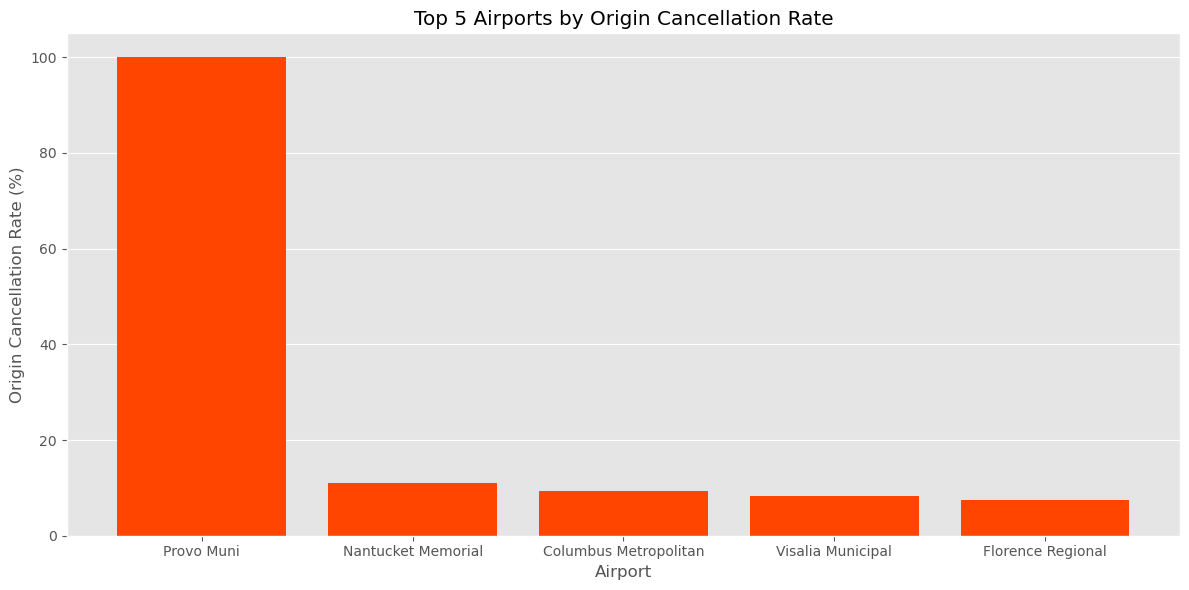

In [119]:
# Plot the top 5 airports by origin cancellation rate

plt.figure(figsize=(12, 6))
plt.bar(top5['airportname'], top5['origin_cancellation_rate'], color='#FF4500')  # Changed to Orange Red
plt.xlabel('Airport')
plt.ylabel('Origin Cancellation Rate (%)')
plt.title('Top 5 Airports by Origin Cancellation Rate')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Provo Municipal Airport has a 100% cancellation rate, meaning all flights were canceled, while Nantucket Memorial, Columbus Metropolitan, Visalia Municipal, and Florence Regional airports had significantly lower rates.

In [125]:
# Add a new column indicating if the airport is in top 5

df7['Group'] = df7['airportname'].apply(lambda x: 'Top 5' if x in top5_codes else 'Others')

# Drop missing cancellation rates

df_clean = df7.dropna(subset=['origin_cancellation_rate', 'dest_cancellation_rate'])

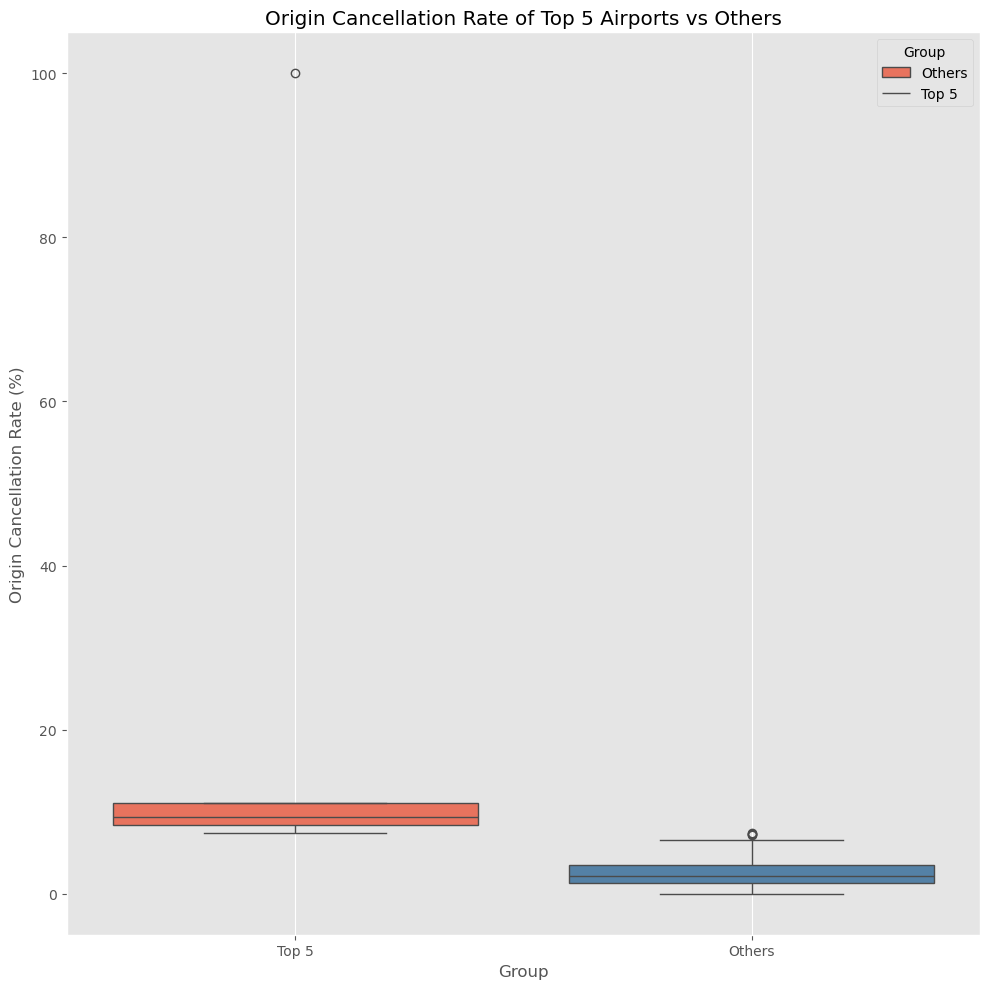

In [129]:
# Plot the cancellation count of top 5 airports vs others

plt.figure(figsize=(10, 10))
sns.boxplot(x='Group', y='origin_cancellation_rate', data=df_clean, palette=['#FF6347', '#4682B4'])  # Changed to Tomato and Steel Blue
plt.title('Origin Cancellation Rate of Top 5 Airports vs Others')
plt.xlabel('Group')
plt.ylabel('Origin Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Group', loc='upper right', labels=['Others', 'Top 5'])
plt.grid()
plt.tight_layout()
plt.show()

## Visualization Interpretation

The boxplot displays the distribution of flight cancellation rates across two airport groups: **Top 5** and **Others**. Each box represents the spread of cancellation rates (in %) within the respective group, highlighting the median, interquartile range (IQR), and any outliers.

### Key Observations:

**Top 5 Airports:**
- Median cancellation rate is around **9–10%**.
- The middle 50% of data (IQR) ranges approximately from **8% to 12%**.
- One significant **outlier** is visible at **100%**, indicating a case where an airport had a complete flight cancellation (potentially due to exceptional circumstances such as weather or operational shutdown).
- Overall, this group exhibits **higher and more variable cancellation rates** compared to the Others.

**Other Airports:**
- Median cancellation rate is around **2%**.
- The IQR spans from roughly **1% to 3%**, with some values close to **0%**, indicating that a few airports had very few or no cancellations.
- There are a few outliers up to **~7–8%**, but no extreme outliers like in the Top 5 group.
- Overall, this group shows **lower and more consistent cancellation rates**.

### Conclusion:
The **Top 5 airports show higher and more variable cancellation rates**, likely influenced by larger operational complexity, higher traffic volume, or external factors (e.g., weather-prone regions or hub congestion). In contrast, **Other airports generally maintain lower cancellation rates** with less extreme variability. These insights suggest that major hubs may face greater challenges in maintaining operational reliability, whereas smaller airports tend to be more consistent.

In [130]:
from scipy.stats import ttest_ind

top5_rates = df_clean[df_clean['Group'] == 'Top 5']['origin_cancellation_rate']
others_rates = df_clean[df_clean['Group'] == 'Others']['origin_cancellation_rate']

t_stat, p_val = ttest_ind(top5_rates, others_rates, equal_var=False)

print(f"Welch's t-test: t = {t_stat:.4f}, p = {p_val:.4f}")

Welch's t-test: t = 1.3576, p = 0.2461


## Statistical Test: Comparing Cancellation Rates

To determine whether the **Top 5 airports** have significantly different cancellation rates compared to **Other airports**, we perform an **independent two-sample t-test**. This test assesses whether the means of two independent groups are statistically different.

### Test Details:
- **Null Hypothesis (H₀):** There is **no significant difference** in the average cancellation rates between the two groups.
- **Alternative Hypothesis (H₁):** There **is a significant difference** in the average cancellation rates.

We assume **unequal variances** between the groups and use `equal_var=False`.

### Results:
- **T-statistic:** 1.3576
- **P-value:** 0.2461

### Conclusion:
Since the **p-value > 0.05**, we **fail to reject the null hypothesis**. This suggests that the **mean cancellation rates of the Top 5 airports are not significantly different from those of the Other airports**. The observed difference in cancellation rates could likely be due to random variation.

### Destination Cancellation Rate

Next, we examine **destination cancellation rates**. Destination cancellations occur when flights cannot land at their intended destinations, even after takeoff. This can result in flights returning to their origin or being diverted to alternate airports.

Common causes include:

- **Harsh weather conditions**
- **Emergencies**
- **Security alerts**

Understanding destination cancellation rates is crucial for assessing the reliability of flights and the potential for disruptions during travel.

In [131]:
# Sort and select top 5 airports by origin cancellation rate

top5 = df7.sort_values(by='dest_cancellation_rate', ascending=False).head(5)
top5_codes = top5['airportname'].tolist()

print("Top 5 Airports by Destination Cancellation Rate:")
for index, row in top5.iterrows():
    print(f"{row['airportname']} ({row['airportcode']}): {row['origin_cancellation_rate']:.2f}%")

Top 5 Airports by Destination Cancellation Rate:
Nantucket Memorial (ACK): 11.01%
Columbus Metropolitan (CSG): 9.36%
Visalia Municipal (VIS): 8.35%
Key  (MEI): 7.19%
Florence Regional (FLO): 7.45%


In [132]:
# Add a new column indicating if the airport is in top 5

df7['Group'] = df7['airportname'].apply(lambda x: 'Top 5' if x in top5_codes else 'Others')

# Drop missing cancellation rates
df_clean = df7.dropna(subset=['origin_cancellation_rate', 'dest_cancellation_rate'])

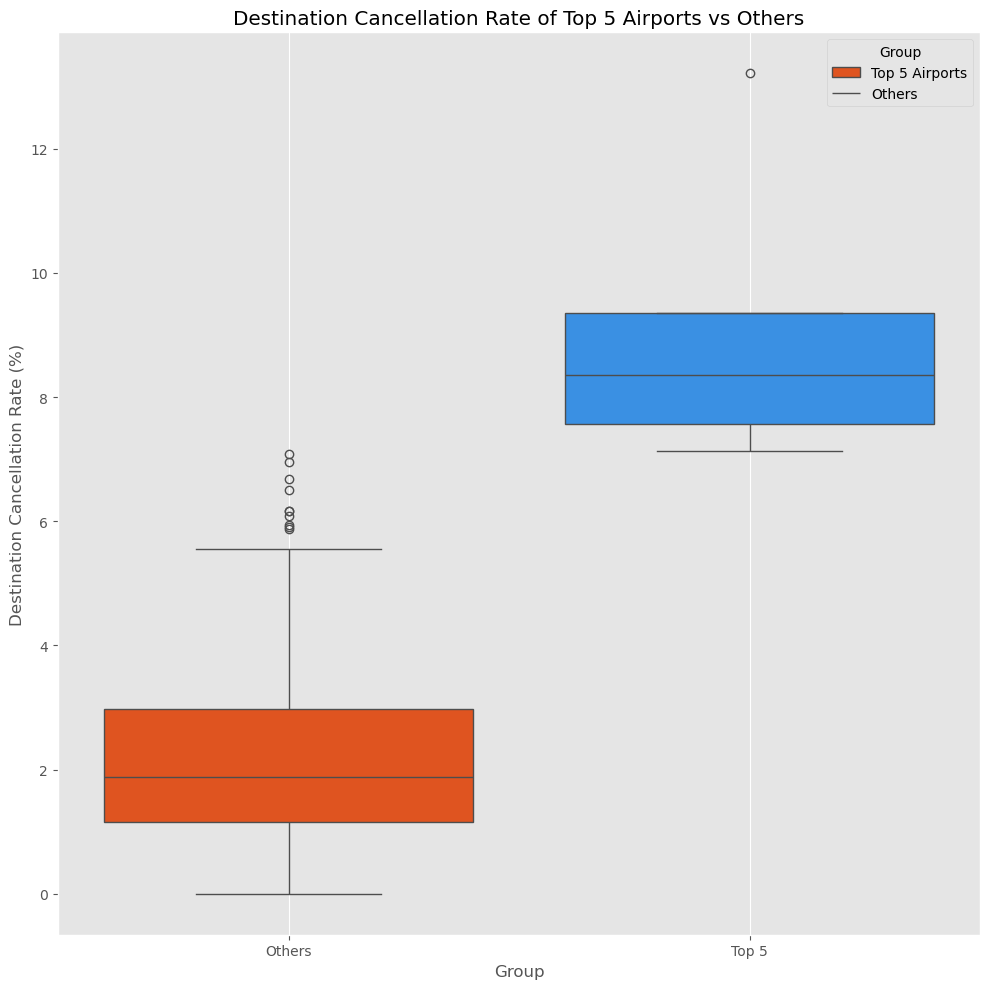

In [135]:
# Plot the cancellation rate of top 5 airports vs others
plt.figure(figsize=(10, 10))
sns.boxplot(x='Group', y='dest_cancellation_rate', data=df_clean, palette=['#FF4500', '#1E90FF'])  # Changed to Orange Red and Dodger Blue
plt.title('Destination Cancellation Rate of Top 5 Airports vs Others')
plt.xlabel('Group')
plt.ylabel('Destination Cancellation Rate (%)')
plt.legend(title='Group', loc='upper right', labels=['Top 5 Airports', 'Others'])
plt.grid()
plt.tight_layout()
plt.show()

## Visualization Interpretation

The boxplot displays the distribution of flight cancellation rates across two airport groups: **Top 5** and **Others**. Each box represents the spread of cancellation rates (in %) within the respective group, highlighting the median, interquartile range (IQR), and any outliers.

### Key Observations:

**Top 5 Airports:**
- Median cancellation rate is around **8–8.5%**.
- The middle 50% of data (IQR) ranges approximately from **7.5% to 9%**.
- One significant **outlier** is visible at around **13%**, indicating a case where a destination airport experienced unusually high cancellations (potentially due to severe weather or operational disruptions).
- Overall, this group exhibits **higher and more consistent cancellation rates** compared to the Others.

**Other Airports:**
- Median cancellation rate is around **2%**.
- The IQR spans from roughly **1% to 3%**, with some values close to **0%**, indicating that several airports had minimal or no cancellations.
- There are multiple outliers up to around **6–7%**, showing that a few airports did experience elevated cancellation rates.
- Overall, this group shows **lower and more variable cancellation rates**.

### Conclusion:
The **Top 5 airports show higher and more consistent destination cancellation rates**, likely reflecting challenges associated with handling higher traffic volumes, congestion, or external factors at major hubs. In contrast, **Other airports generally maintain lower cancellation rates**, though with more variability across individual airports. These insights suggest that flights **to** major hubs may be more prone to cancellation risks, while smaller airports show more mixed performance.|

In [139]:
from scipy.stats import ttest_ind

top5_rates = df_clean[df_clean['Group'] == 'Top 5']['dest_cancellation_rate']
others_rates = df_clean[df_clean['Group'] == 'Others']['dest_cancellation_rate']

t_stat, p_val = ttest_ind(top5_rates, others_rates, equal_var=False)

print(f"Welch's t-test: t = {t_stat:.4f}, p = {p_val:.4f}")

Welch's t-test: t = 6.3295, p = 0.0031


## Statistical Test: Comparing Destination Cancellation Rates

To determine whether the **Top 5 airports** have significantly different destination cancellation rates compared to **Other airports**, we perform an **independent two-sample t-test**. This test assesses whether the means of two independent groups are statistically different.

### Test Details:
- **Null Hypothesis (H₀):** There is **no significant difference** in the average destination cancellation rates between the two groups.
- **Alternative Hypothesis (H₁):** There **is a significant difference** in the average destination cancellation rates.

We assume **unequal variances** between the groups and use `equal_var=False`.

### Results:
- **T-statistic:** 6.3295
- **P-value:** 0.0031

### Conclusion:
Since the **p-value < 0.05**, we **reject the null hypothesis**. This suggests that the **mean destination cancellation rates of the Top 5 airports are significantly different from those of the Other airports**. The observed difference in cancellation rates is unlikely to be due to random variation.

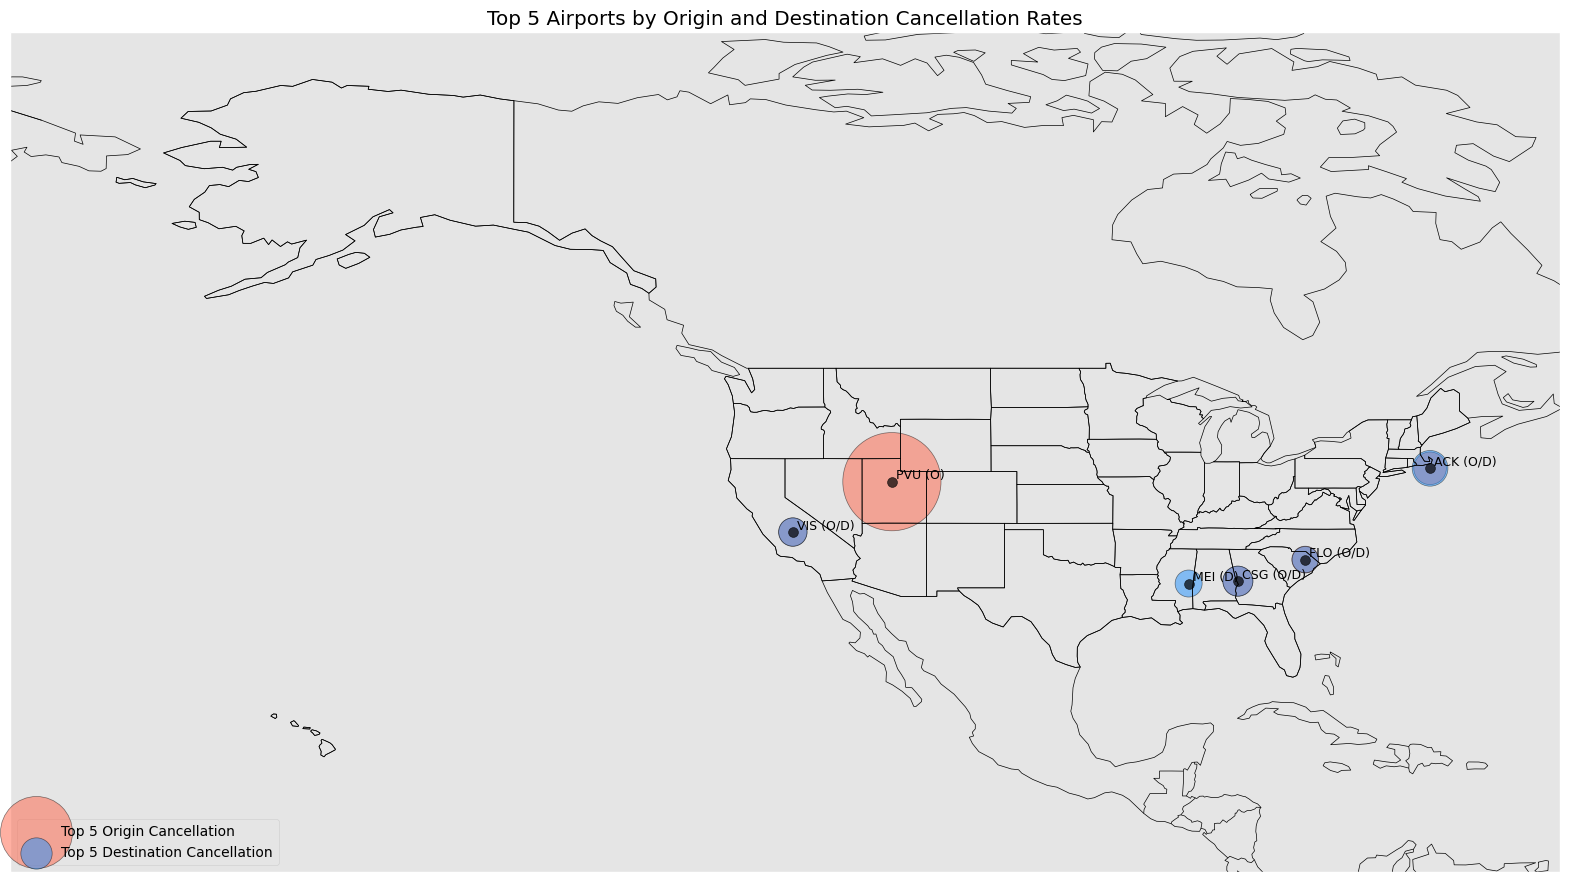

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select top 5 by origin and destination cancellation rate

top5_origin = df7.sort_values(by='origin_cancellation_rate', ascending=False).head(5)
top5_dest = df7.sort_values(by='dest_cancellation_rate', ascending=False).head(5)

# Set up the map

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Map features

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.set_extent([-180, -60, 10, 75], crs=ccrs.PlateCarree())

# Plot top 5 origin cancellation airports
origin_scatter = ax.scatter(
    top5_origin['longitude'],
    top5_origin['latitude'],
    s=top5_origin['origin_cancellation_rate'] * 50,
    color='#FF6347',  # Changed to Tomato
    alpha=0.5,
    label='Top 5 Origin Cancellation',
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Plot top 5 destination cancellation airports

dest_scatter = ax.scatter(
    top5_dest['longitude'],
    top5_dest['latitude'],
    s=top5_dest['dest_cancellation_rate'] * 50,
    color='#1E90FF',  # Changed to Dodger Blue
    alpha=0.5,
    label='Top 5 Destination Cancellation',
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Add airport names to the scatter points
# If origin and destination airports have the same name, use 1 label
# Combine top5 origin and destination airports

combined = pd.concat([top5_origin, top5_dest]).drop_duplicates(subset='airportcode')

# Add a column indicating label type: O, D, or both

def get_label_type(row):
    is_origin = row['airportcode'] in top5_origin['airportcode'].values
    is_dest = row['airportcode'] in top5_dest['airportcode'].values
    if is_origin and is_dest:
        return '(O/D)'
    elif is_origin:
        return '(O)'
    elif is_dest:
        return '(D)'

combined['label'] = combined.apply(get_label_type, axis=1)

# Plot all combined airports with appropriate colors and labels

for _, row in combined.iterrows():
    color = 'black'
    ax.scatter(row['longitude'], row['latitude'],
               s=50,
               color=color,
               alpha=0.7,
               edgecolor='k',
               transform=ccrs.PlateCarree())

    ax.text(row['longitude'] + 0.3, row['latitude'] + 0.3,
            f"{row['airportcode']} {row['label']}",
            fontsize=9,
            color=color,
            transform=ccrs.PlateCarree())

plt.title('Top 5 Airports by Origin and Destination Cancellation Rates')
plt.legend(loc='lower left')
plt.show()

## Key Differences in Origin vs Destination Cancellations

| Aspect                | Origin Cancellation                      | Destination Cancellation                |
|-----------------------|-----------------------------------------|-----------------------------------------|
| **Flight Status**     | Cancelled before takeoff                | May take off, then diverted or returned |
| **Cause**             | Origin-side issues                      | Destination-side issues                 |
| **Passenger Location**| Still at departure airport              | May be mid-air or diverted              |
| **Logistics Impact**  | Easier to manage (no fuel or air traffic used) | More complex (in-flight management, rerouting) |

## Summary of Airports with High Cancellation Rates

| Category                               | Airport Name              | Airport Code | Cancellation Rate (%) |
|----------------------------------------|---------------------------|---------------|-----------------------|
| **Top 5 Airports by Origin Cancellation Rate** | Provo Muni               | PVU           | 100.00%               |
|                                        | Nantucket Memorial        | ACK           | 11.01%                |
|                                        | Columbus Metropolitan      | CSG           | 9.36%                 |
|                                        | Visalia Municipal         | VIS           | 8.35%                 |
|                                        | Florence Regional         | FLO           | 7.45%                 |

| Category                               | Airport Name              | Airport Code | Cancellation Rate (%) |
|----------------------------------------|---------------------------|---------------|-----------------------|
| **Top 5 Airports by Destination Cancellation Rate** | Nantucket Memorial        | ACK           | 11.01%                |
|                                        | Columbus Metropolitan      | CSG           | 9.36%                 |
|                                        | Visalia Municipal         | VIS           | 8.35%                 |
|                                        | Key                       | MEI           | 7.19%                 |
|                                        | Florence Regional         | FLO           | 7.45%                 |

### Conclusion
The analysis highlights significant discrepancies in cancellation rates among airports. Provo Muni stands out with a 100% origin cancellation rate, indicating severe operational challenges. Meanwhile, Nantucket Memorial appears in both categories, suggesting it experiences notable disruptions for both origin and destination flights. Understanding these patterns can help travelers make informed decisions when planning their journeys.

### E.) Cancellations Correlated with Time-Period

This analysis focuses on how timing affects flight cancellations.

1. **Timing Analysis**:
   - Examine cancellation rates by month.

2. **Key Considerations**:
   - Some months may see more cancellations due to weather or high travel demand.

3. **Insights**:
   - Understanding monthly trends can help travelers choose better times to fly.

4. **Next Steps**:
   - Further investigate reasons for cancellations during specific months.

### Based on Month:

In [41]:
query8 = '''
SELECT
	Month,
	SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
	COUNT(*) AS total_flights,
    ROUND(100.0 * SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM flight_data
GROUP BY Month
ORDER BY Month ASC
'''

df8 = pull_data(query8)
df8

,month,cancellation_count,total_flights,cancellation_rate_pct
0,NaN,0,1,0.00
1,1.0,25084,594924,4.22
2,2.0,9505,545332,1.74
3,3.0,10169,617540,1.65
4,4.0,7532,594492,1.27
5,5.0,5877,614802,0.96
6,6.0,9916,609195,1.63
7,7.0,13851,627961,2.21
8,8.0,13452,630904,2.13
9,9.0,11532,574253,2.01


In [43]:
query9 = '''
SELECT
    Month,
    CASE
        WHEN DayOfWeek = 1 THEN 'Mon'
        WHEN DayOfWeek = 2 THEN 'Tue'
        WHEN DayOfWeek = 3 THEN 'Wed'
        WHEN DayOfWeek = 4 THEN 'Thu'
        WHEN DayOfWeek = 5 THEN 'Fri'
        WHEN DayOfWeek = 6 THEN 'Sat'
        WHEN DayOfWeek = 7 THEN 'Sun'
    END AS DayOfWeek,
    SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count,
    COUNT(*) AS total_flights
FROM flight_data
GROUP BY Month, DayOfWeek
'''
df9 = pull_data(query9)
df9

,month,dayofweek,cancellation_count,total_flights
0,1.0,Mon,2292,99685
1,1.0,Tue,1705,78258
2,1.0,Thu,3223,79336
3,1.0,Fri,2092,79519
4,1.0,Sun,5069,94936
...,...,...,...,...
80,12.0,Mon,964,77029
81,12.0,Tue,983,75228
82,12.0,Wed,2081,75854
83,12.0,Thu,2725,96752


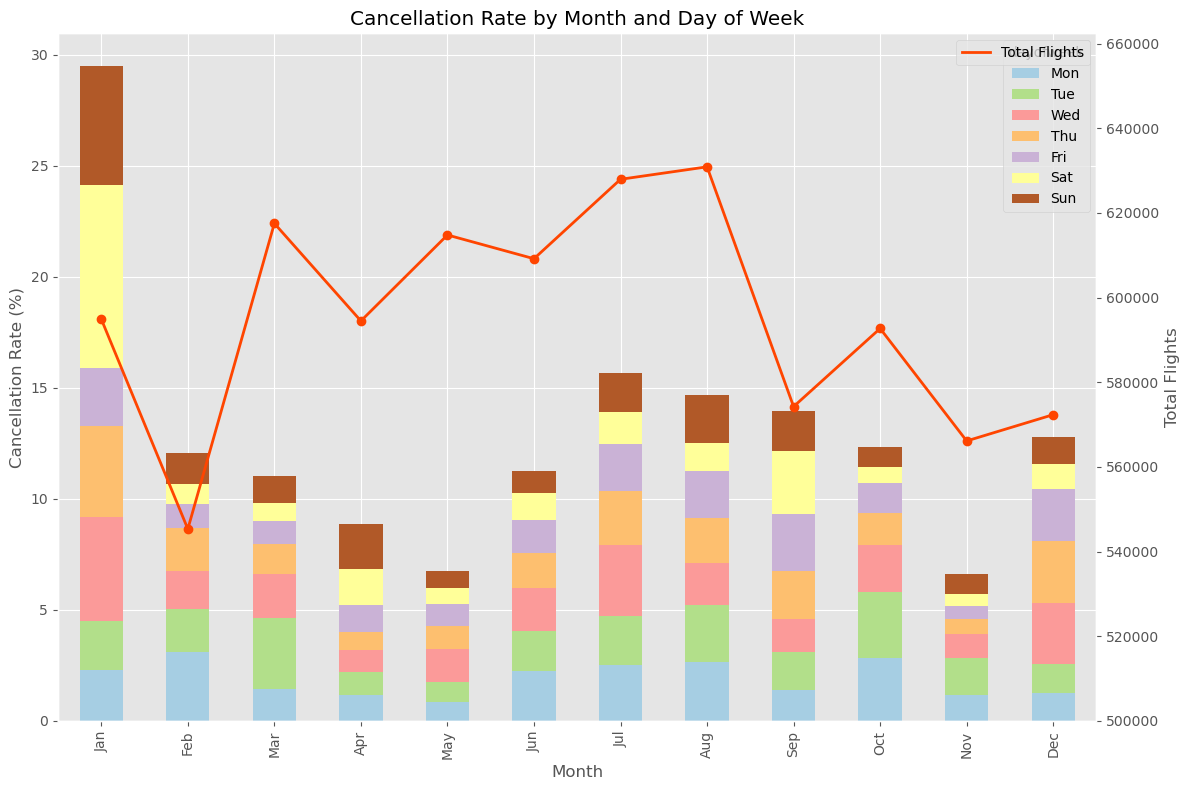

In [141]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create pivot table for cancellation rate by month and day of week

df9['cancel_rate'] = df9['cancellation_count'] / df9['total_flights'] * 100
pivot_df = df9.pivot_table(index='month', columns='dayofweek', values='cancel_rate', fill_value=0)
pivot_df = pivot_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# Ensure the index is 1-12 for months

pivot_df.index = list(range(1, 13))

# Define month labels

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot Stacked bar chart with updated colors

bars = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired', ax=ax1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Cancellation Rate (%)')
ax1.set_title('Cancellation Rate by Month and Day of Week')

# Create a second y-axis for total flights

ax2 = ax1.twinx()

# Get bar positions (0-11)

x_positions = np.arange(len(pivot_df.index))

# Match df8's data to the bar positions

total_flights_data = []
for month in range(1, 13):
    if month in df8['month'].values:
        total_flights_data.append(df8.loc[df8['month'] == month, 'total_flights'].values[0])
    else:
        total_flights_data.append(0) 

# Plot the line using the bar positions with a new color

ax2.plot(x_positions, total_flights_data, color='#FF4500', marker='o', label='Total Flights', linewidth=2)
ax2.set_ylim(500000, max(total_flights_data) * 1.05)
ax2.set_ylabel('Total Flights')

# Create combined legend

legend_elements = [plt.Line2D([0], [0], color='#FF4500', lw=2, label='Total Flights')]
ax2.legend(handles=legend_elements, loc='upper right')

# Set x-tick labels to month names

ax1.set_xticks(x_positions)
ax1.set_xticklabels(month_labels)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart displays the distribution of **flight cancellation rates by month and day of week** along with the **total number of flights per month**. The cancellation rate is represented by a **stacked bar chart** (showing contributions by day of week), and total flight volume is shown by a **line plot**.

### Key Observations:

**Cancellation Rate (Bar Chart):**
- **January** shows the **highest overall cancellation rate (~29%)**, with particularly large contributions from **Saturday** and **Sunday**, suggesting seasonal factors (e.g. winter weather).
- **February** cancellation rates drop sharply to around **9%**, consistent with the post-holiday recovery period.
- **March through May** maintain **low cancellation rates (5%–12%)**, representing a stable travel season.
- **June through August** show increased cancellation rates (**~10%–16%**), likely influenced by **summer congestion** and **weather-related delays**.
- **September** marks another decrease (~14%), with modest fluctuations in **October to December**.
- Across months, **weekends (Saturday and Sunday)** often contribute more heavily to cancellations, suggesting operational or demand-related challenges on those days.

**Total Flights (Line Plot):**
- **Flight volume peaks** in **July and August** (~640,000+ flights), coinciding with **higher cancellation rates**.
- The **lowest flight volume** occurs in **May (~520,000 flights)**, which also has one of the **lowest cancellation rates**.
- **January** has relatively high cancellations despite only moderate flight volume, highlighting the impact of **seasonal disruptions** (e.g. winter storms).
- Flight volume trends remain relatively steady for the rest of the year, with minor dips in late fall (November).

### Conclusion:
The visualization highlights strong **seasonal patterns in cancellation rates**, with peaks in **winter** and **summer**. **Weekends** tend to experience **higher cancellation contributions** across most months. While **total flight volume correlates somewhat with cancellation rates**

In [143]:
query10 = '''
SELECT
    DayofMonth,
    CASE
        WHEN DayOfWeek = 1 THEN 'Mon'
        WHEN DayOfWeek = 2 THEN 'Tue'
        WHEN DayOfWeek = 3 THEN 'Wed'
        WHEN DayOfWeek = 4 THEN 'Thu'
        WHEN DayOfWeek = 5 THEN 'Fri'
        WHEN DayOfWeek = 6 THEN 'Sat'
        WHEN DayOfWeek = 7 THEN 'Sun'
    END AS DayOfWeek,
	SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
	COUNT(*) AS total_flights,
    ROUND(100.0 * SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM flight_data
WHERE Month = 5
GROUP BY DayofMonth, DayOfWeek
ORDER BY DayofMonth, DayOfWeek ASC
'''
df10 = pull_data(query10)
df10

,dayofmonth,dayofweek,cancellation_count,total_flights,cancellation_rate_pct
0,1,Sun,111,19662,0.56
1,2,Mon,144,20561,0.70
2,3,Tue,157,20219,0.78
3,4,Wed,137,20454,0.67
4,5,Thu,236,20610,1.15
5,6,Fri,146,20620,0.71
6,7,Sat,105,17760,0.59
7,8,Sun,244,19615,1.24
8,9,Mon,202,20515,0.98
9,10,Tue,215,20148,1.07


### Based by Day

From the graph above, we observe that May has the lowest cancellation rates, even with a moderate travel volume. Therefore, we can focus our analysis on May to explore patterns throughout the month.

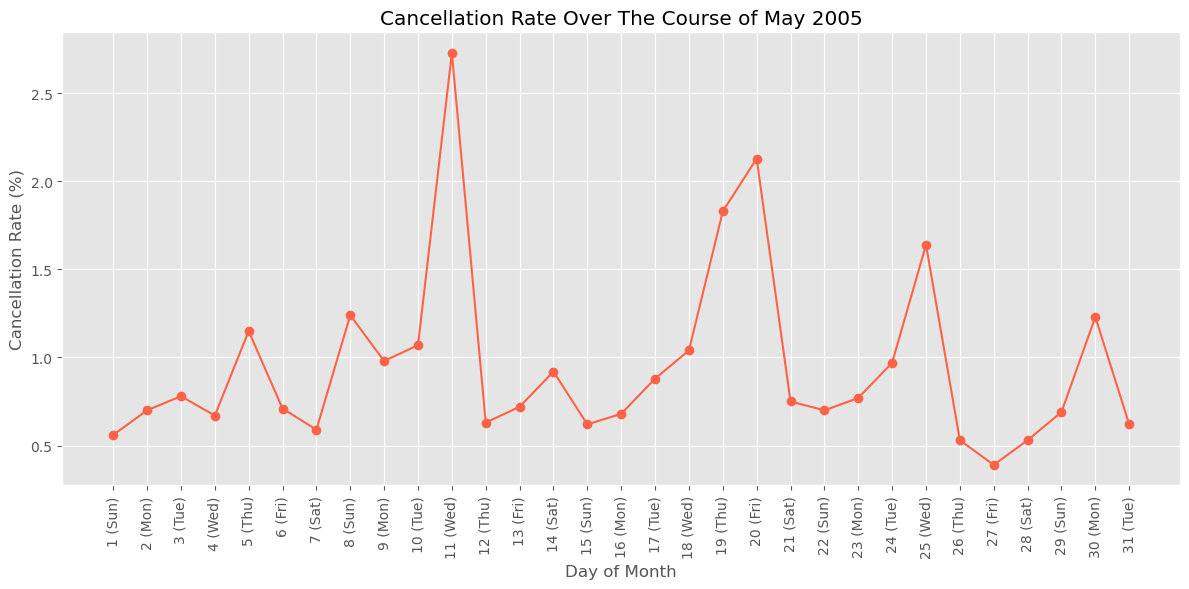

In [144]:
temp = df10.copy()  # Create a temporary copy of df10 to plot

# Plot the day of month vs cancellation rate
plt.figure(figsize=(12, 6))
plt.plot(temp['dayofmonth'], temp['cancellation_rate_pct'], marker='o', color='#FF6347')

# Get the x-positions (days of month)
x_positions = temp['dayofmonth']

day_labels = temp['dayofweek'].copy()

# Get the corresponding day of week labels
for index, label in zip(x_positions, temp['dayofweek']):
    day_labels[index-1] = f"{index} ({label})"

plt.xlabel('Day of Month')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate Over The Course of May 2005')
plt.xticks(ticks=x_positions, labels=day_labels, rotation=90)
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart displays the **daily cancellation rate (%)** over the course of **May 2005**, with each data point representing a specific day of the month, annotated by the **day of the week**. The data is shown using a **line plot with markers** to highlight day-to-day variations.

### Key Observations:

**Cancellation Rate (Line Plot):**
- The **highest spike** occurs on **May 11 (Wednesday)**, reaching a cancellation rate of **~2.7%**, significantly above the baseline, indicating a possible **isolated event or operational disruption**.
- Other **notable peaks** are on:
  - **May 20 (Friday)**: ~2.1%
  - **May 19 (Thursday)**: ~1.8%
  - **May 25 (Wednesday)**: ~1.6%
  - **May 30 (Monday)**: ~1.25%
- **Sundays and Wednesdays** tend to have **higher variability**, with **May 8 (Sunday)** and **May 11 (Wednesday)** showing elevated cancellation rates.
- Most days maintain a **cancellation rate below 1%**, suggesting relatively **stable operational conditions** throughout the month.

**Day-of-Week Patterns:**
- **Fridays and Wednesdays** appear more prone to spikes, potentially due to **increased traffic volumes** or **mid-week disruptions**.
- **Weekends (Saturday–Sunday)** show lower and more stable cancellation rates, aside from the spike on May 8.
- **Saturday** has the **lowest overall cancellation rate**, with consistently low values throughout the month.

### Conclusion:
The visualization indicates that **May 2005 generally experienced low cancellation rates**, with a few **mid-week spikes** likely tied to isolated events. The **outlier on May 11** suggests a disruption warranting further investigation. Overall, the month reflects **reliable operations with minor fluctuations**, primarily around **Wednesdays and Fridays**.


### Based by Time

Again, the analysis can be further refined. We have identified that the best month to travel is May, and the best day is Saturday. Therefore, we will examine Saturdays in more detail to determine the optimal times to travel in order to avoid flight cancellations.

In [145]:
# May, Saturday

query11 = '''
SELECT
  CASE
    WHEN CRSDepTime BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CRSDepTime BETWEEN 1200 AND 1659 THEN 'Afternoon'
    WHEN CRSDepTime BETWEEN 1700 AND 2059 THEN 'Evening'
    WHEN (CRSDepTime >= 2100 AND CRSDepTime <= 2359) OR (CRSDepTime >= 0 AND CRSDepTime < 500) THEN 'Night'
    ELSE 'Unknown'
  END AS crsdeptime,
  SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) AS cancellation_count, 
  COUNT(*) AS total_flights,
  ROUND(100.0 * SUM(CASE WHEN Cancelled > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancellation_rate_pct
FROM flight_data
WHERE
  Month = 5 AND DayOfWeek = 6
GROUP BY
  CASE
    WHEN CRSDepTime BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CRSDepTime BETWEEN 1200 AND 1659 THEN 'Afternoon'
    WHEN CRSDepTime BETWEEN 1700 AND 2059 THEN 'Evening'
    WHEN (CRSDepTime >= 2100 AND CRSDepTime <= 2359) OR (CRSDepTime >= 0 AND CRSDepTime < 500) THEN 'Night'
    ELSE 'Unknown'
  END
ORDER BY crsdeptime
'''

df11 = pull_data(query11)
df11

,crsdeptime,cancellation_count,total_flights,cancellation_rate_pct
0,Afternoon,155,22958,0.68
1,Evening,121,14874,0.81
2,Morning,197,29560,0.67
3,Night,21,3347,0.63


In [146]:
# Reorder the time of day

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df11 = df11.groupby('crsdeptime', observed=True).agg(
    cancellation_count=('cancellation_count', 'mean'),
    total_flights=('total_flights', 'mean'),
    cancellation_rate_pct=('cancellation_rate_pct', 'mean')
).reindex(time_order)
df11

,cancellation_count,total_flights,cancellation_rate_pct
crsdeptime,,,
Morning,197.0,29560.0,0.67
Afternoon,155.0,22958.0,0.68
Evening,121.0,14874.0,0.81
Night,21.0,3347.0,0.63


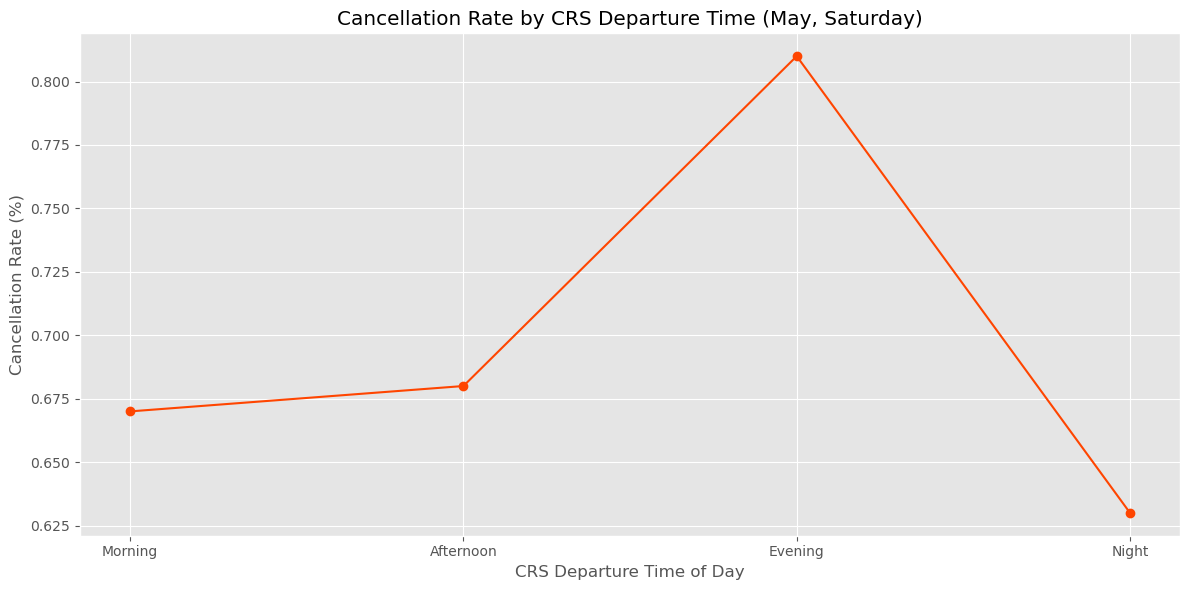

In [150]:
# Plot the CRS departure time vs cancellation rate

plt.figure(figsize=(12, 6))
plt.plot(df11.index, df11['cancellation_rate_pct'], marker='o', color='#FF4500')

plt.xlabel('CRS Departure Time of Day')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by CRS Departure Time (May, Saturday)')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart shows the **cancellation rate by CRS departure time of day** for **Saturdays in May**, using a **line plot** to display the trend across four time segments: **Morning, Afternoon, Evening, and Night**.

### Key Observations:

- **Evening flights** have the **highest cancellation rate (~0.81%)**, suggesting that disruptions accumulate throughout the day and are more likely to impact later flights.
- **Afternoon flights** have a slightly higher cancellation rate (~0.68%) than **Morning flights (~0.67%)**, indicating a small increase as the day progresses.
- **Night flights** show the **lowest cancellation rate (~0.63%)**, possibly due to lower volume or recovery from earlier delays.
- Overall, there's a **peak in cancellations during the evening**, followed by a **drop at night**.

### Conclusion:
For **Saturdays in May**, cancellation rates tend to **increase from morning to evening**, peaking during **evening departures**, then dropping at **night**. This pattern may reflect cumulative delays and operational constraints that affect flights later in the day.

## 4. Problematic Routes

### A.) Identifying Poor Performance in the Airline Industry

In this analysis, I focused on identifying routes, carriers, or flight numbers with poor performance. Poor performance is defined by:

- **High Cancellation Rates**: Routes or carriers with above-average cancellation rates and frequent cancellations.
- **High Delay Times**: Flights delayed over 15 minutes from the scheduled departure time.

I will analyze cancellation and delay data to identify these poor performers. Understanding these patterns helps travelers make better decisions.

In [55]:
query12 = '''
SELECT *
FROM (
    SELECT
        d.Origin,
        d.Dest,
        c.Description AS Description,
        d.FlightNum AS FlightNumber,
        COUNT(*) AS total_flights,
        SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS cancellation_count,
        ROUND(100.0 * SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_rate_pct,
        AVG(ArrDelay) AS avg_arrival_delay,
        AVG(DepDelay) AS avg_departure_delay
    FROM flight_data d
    LEFT JOIN
        carrier_data c ON d.UniqueCarrier = c.Code
    GROUP BY d.Origin, d.Dest, c.Description, d.FlightNum
    HAVING COUNT(*) >= 100 -- filter out low-volume routes
) AS route_stats
WHERE avg_arrival_delay > 15 OR avg_departure_delay > 15 
ORDER BY cancel_rate_pct DESC, avg_arrival_delay DESC, avg_departure_delay DESC
LIMIT 20
'''
df12 = pull_data(query12)
df12

,origin,dest,description,flightnumber,total_flights,cancellation_count,cancel_rate_pct,avg_arrival_delay,avg_departure_delay
0,PHL,EWR,Expressjet Airlines Inc.,2344,188,57,30.32,40.877863,20.000000
1,ATL,MSY,Delta Air Lines Inc.,1584,116,29,25.00,15.896552,16.965517
2,IAD,EWR,Expressjet Airlines Inc.,1212,186,46,24.73,53.000000,33.178571
3,EWR,DTW,Northwest Airlines Inc.,667,175,41,23.43,15.850746,17.962687
4,EWR,IAD,Expressjet Airlines Inc.,1215,113,26,23.01,48.356322,48.379310
5,IAD,EWR,Expressjet Airlines Inc.,1214,103,23,22.33,49.700000,46.125000
6,EWR,PVD,Expressjet Airlines Inc.,2785,175,39,22.29,17.058824,14.338235
7,GSP,EWR,Expressjet Airlines Inc.,3020,171,38,22.22,45.242424,34.781955
8,PIT,EWR,Expressjet Airlines Inc.,2968,159,35,22.01,55.225806,53.532258
9,EWR,IAD,Expressjet Airlines Inc.,1213,174,38,21.84,56.308824,48.602941


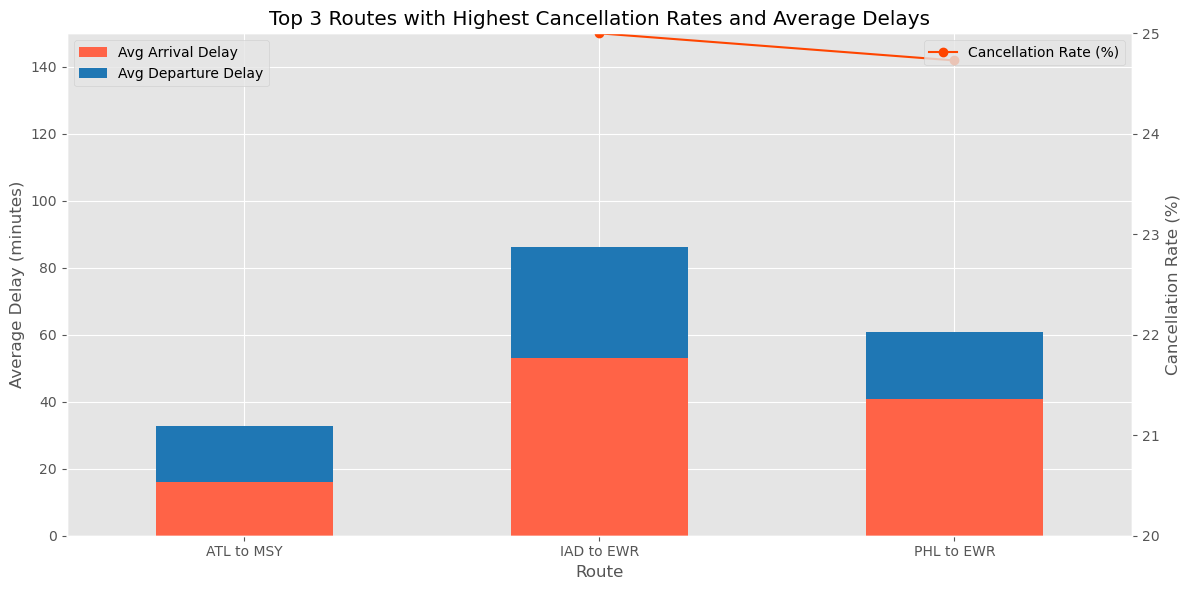

In [151]:
top5_poor_routes = df12.head(3)

# Add a new column for the route

top5_poor_routes['route'] = top5_poor_routes['origin'] + ' to ' + top5_poor_routes['dest']

# Create pivot table for delay type and average delay

delay_pivot = top5_poor_routes.pivot_table(index='route', values=['avg_arrival_delay', 'avg_departure_delay'], aggfunc='mean')


# Plot the top flights with highest cancellation rates

fig, ax1 = plt.subplots(figsize=(12, 6))
delay_pivot.plot(kind='bar', ax=ax1, color=['#FF6347', '#1F77B4'], stacked=True)
ax1.set_ylim(0, 150)
ax1.set_xlabel('Route')
ax1.set_ylabel('Average Delay (minutes)')
ax1.set_title('Top 3 Routes with Highest Cancellation Rates and Average Delays')
ax1.set_xticklabels(delay_pivot.index, rotation=0)
ax1.legend(['Avg Arrival Delay', 'Avg Departure Delay'], loc='upper left')

ax2 = ax1.twinx()

ax2.plot(top5_poor_routes['route'], top5_poor_routes['cancel_rate_pct'], color='#FF4500', marker='o', label='Cancellation Rate (%)')  # Changed to Orange Red
ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_ylim(20, 25)
ax2.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart shows the **top 3 flight routes with the highest cancellation rates** and their corresponding **average arrival and departure delays**, using a **stacked bar chart** for delay times and a **line plot** for cancellation rates.

### Key Observations:

- **Route: IAD to EWR**
  - Has the **highest average delay** (~87 minutes total), with **arrival delays (~53 minutes)** being the primary contributor.
  - Also has the **highest cancellation rate (~24.8%)**, shown by the peak of the orange line.

- **Route: PHL to EWR**
  - Shows a **moderate total delay (~61 minutes)**, again dominated by **arrival delays (~41 minutes)**.
  - Its **cancellation rate (~21.5%)** is slightly lower than IAD to EWR but still significant.

- **Route: ATL to MSY**
  - Has the **lowest delays (~33 minutes total)** among the three routes.
  - Also has the **lowest cancellation rate (~20.3%)**, aligning with the trend of lower delays.

### Conclusion:

Routes with **higher average delays—particularly arrival delays—tend to also have higher cancellation rates**. The **IAD to EWR** route stands out as the most problematic, both in terms of delays and cancellations. This suggests a potential operational bottleneck or high congestion affecting this route.

### B.) Analyzing the Reasons for Flight Delays and Cancellations

In this analysis, I will examine the underlying reasons that contribute to delays and cancellations of specific flights. Understanding these factors is crucial for both airlines and travelers.

### Plane Performance

Once we identify the problematic routes, we can gain deeper insights by further analyzing the data. Questions like, "Which aircraft are contributing to these issues?" and "What factors are causing the delays at these underperforming airports?" can be addressed. Our goal is to begin by describing the aircraft utilization within the top three routes.

In [7]:
query13 = '''
SELECT 
	CONCAT(d.Origin, '-', d.Dest) AS routes,
	d.FlightNum,
	d.TailNum,
	p.Type,
	p.Manufacturer,
	p.Issue_date,
	p.Model,
	p.Aircraft_Type,
	p.Engine_Type,
	p.Year
FROM flight_data d
LEFT JOIN 
	plane_data p ON d.TailNum = p.TailNum
WHERE 
	(d.Origin, d.Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR')) AND d.FlightNum IN ('2344','1584','1212')
'''

df13 = pull_data(query13)
df13

,routes,flightnum,tailnum,type,manufacturer,issue_date,model,aircraft_type,engine_type,year
0,IAD-EWR,1212,N13936,Corporation,EMBRAER,02/23/1998,EMB-145EP,Fixed Wing Multi-Engine,Turbo-Jet,1997.0
1,PHL-EWR,2344,0,None,None,None,None,None,None,NaN
2,IAD-EWR,1212,0,None,None,None,None,None,None,NaN
3,IAD-EWR,1212,0,None,None,None,None,None,None,NaN
4,PHL-EWR,2344,N14174,Corporation,EMBRAER,12/08/2004,EMB-145XR,Fixed Wing Multi-Engine,Turbo-Fan,2004.0
...,...,...,...,...,...,...,...,...,...,...
547,IAD-EWR,1212,N641BR,None,None,None,None,None,None,NaN
548,IAD-EWR,1212,N659BR,Corporation,BOMBARDIER INC,02/27/2007,CL-600-2B19,Fixed Wing Multi-Engine,Turbo-Fan,2001.0
549,IAD-EWR,1212,N652BR,None,None,None,None,None,None,NaN
550,IAD-EWR,1212,N667BR,None,None,None,None,None,None,NaN


In [16]:
df13.dropna(inplace=True)
df13['issue_date'] = pd.to_datetime(df13['issue_date'])
df13['year'] = df13['issue_date'].dt.year
df13[df13['year'] >= 2005].head(3)

,routes,flightnum,tailnum,type,manufacturer,issue_date,model,aircraft_type,engine_type,year
41,ATL-MSY,1584,N965DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,2007-12-14,MD-88,Fixed Wing Multi-Engine,Turbo-Fan,2007
69,ATL-MSY,1584,N919DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,2007-10-09,MD-88,Fixed Wing Multi-Engine,Turbo-Fan,2007
133,ATL-MSY,1584,N982DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,2007-04-23,MD-88,Fixed Wing Multi-Engine,Turbo-Fan,2007


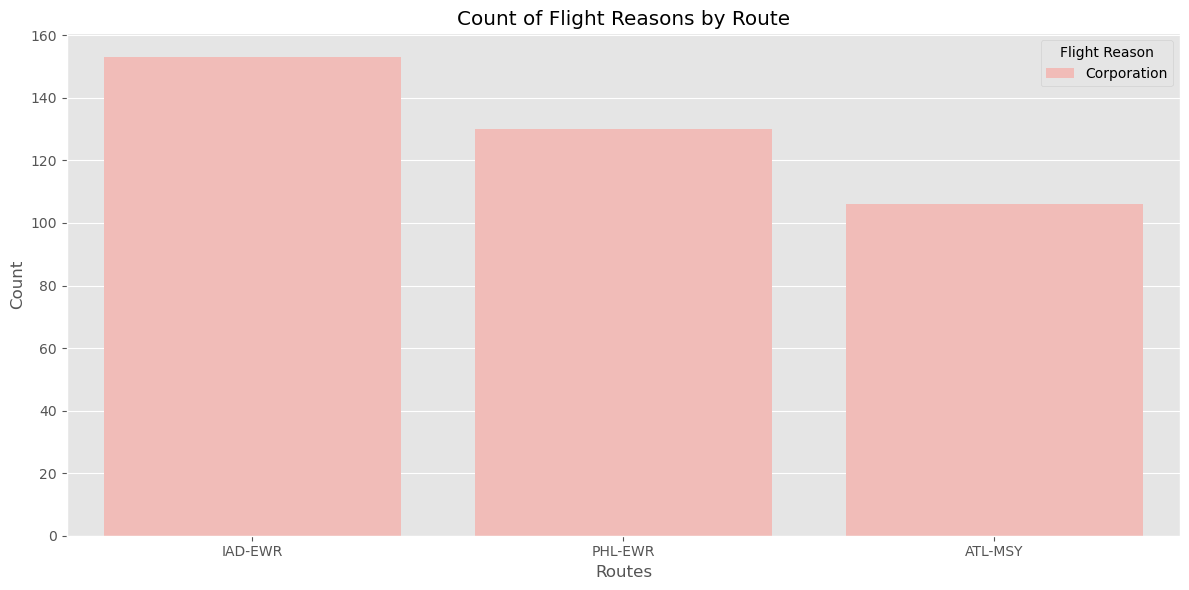

In [17]:
# Plot type

plt.figure(figsize=(12, 6))
sns.countplot(data=df13, x='routes', hue='type', palette='Pastel1')
plt.title('Count of Flight Reasons by Route')
plt.legend(title='Flight Reason', loc='upper right')
plt.xlabel('Routes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart displays the **count of flights taken for corporate reasons** across the top 3 routes with the highest cancellation rates.

### Key Observations:

- **IAD to EWR** has the **highest number of corporate flights (~153)**, which aligns with its high cancellation and delay rates shown in the previous chart.
- **PHL to EWR** follows with approximately **130 corporate flights**, maintaining a significant volume of business-related travel.
- **ATL to MSY** has the **lowest count (~107)** among the three routes, indicating relatively lower business travel frequency.

### Conclusion:

All three routes serve a substantial number of corporate flights, with **IAD to EWR being the most frequently used by corporations**. This may amplify the operational impact of high delays and cancellations on business travelers, emphasizing the need for performance improvements on this route.


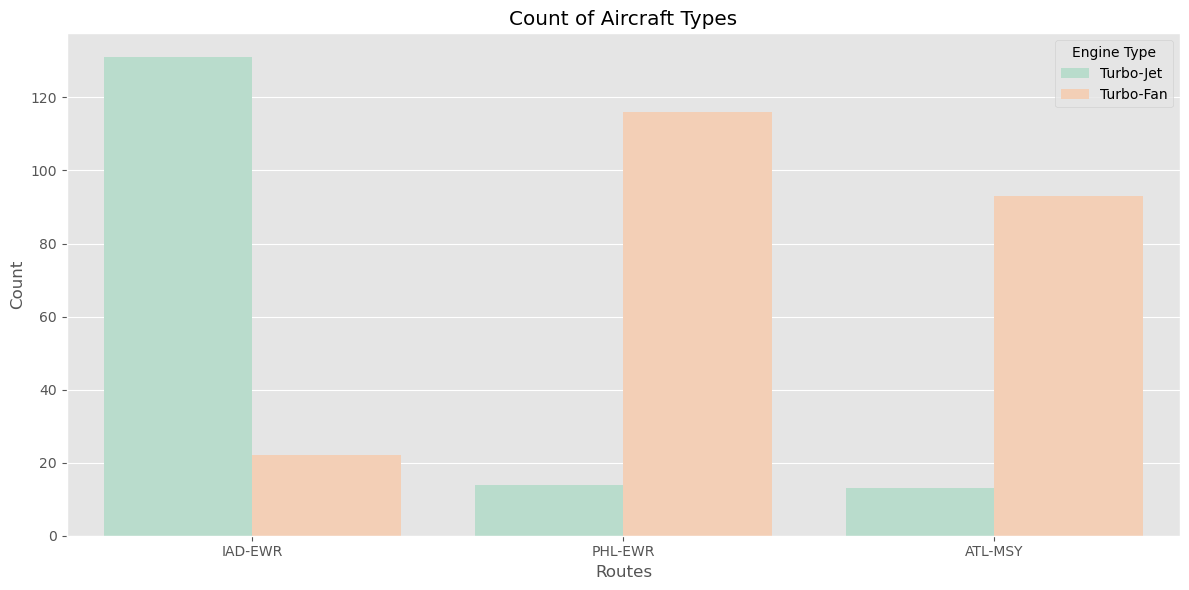

In [18]:
# Plot aircraft type

plt.figure(figsize=(12, 6))
sns.countplot(data=df13, x='routes', hue='engine_type', palette='Pastel2')
plt.legend(title='Engine Type', loc='upper right')
plt.title('Count of Aircraft Types')
plt.xlabel('Routes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Visualization Interpretation

The chart displays the **count of aircraft engine types** used across the top 3 flight routes with the highest cancellation rates. The aircraft are categorized into **Turbo-Jet** and **Turbo-Fan** engine types.

### Key Observations:

- **IAD to EWR**
  - Dominated by **Turbo-Jet engines (~132 flights)**.
  - Only a small number of **Turbo-Fan aircraft (~22 flights)** are used.
  
- **PHL to EWR**
  - In contrast, this route is predominantly served by **Turbo-Fan aircraft (~116 flights)**.
  - Very few **Turbo-Jet aircraft (~14 flights)** operate on this route.

- **ATL to MSY**
  - Also mostly uses **Turbo-Fan aircraft (~93 flights)**.
  - **Turbo-Jet aircraft (~13 flights)** are relatively rare on this route as well.

### Conclusion:

There is a clear **difference in aircraft engine type usage by route**. The **IAD to EWR** route relies heavily on **Turbo-Jet aircraft**, which may correlate with its **higher delays and cancellation rates** seen earlier. Meanwhile, **PHL to EWR** and **ATL to MSY** primarily use **Turbo-Fan aircraft**, which might be more efficient or reliable in those operational contexts.


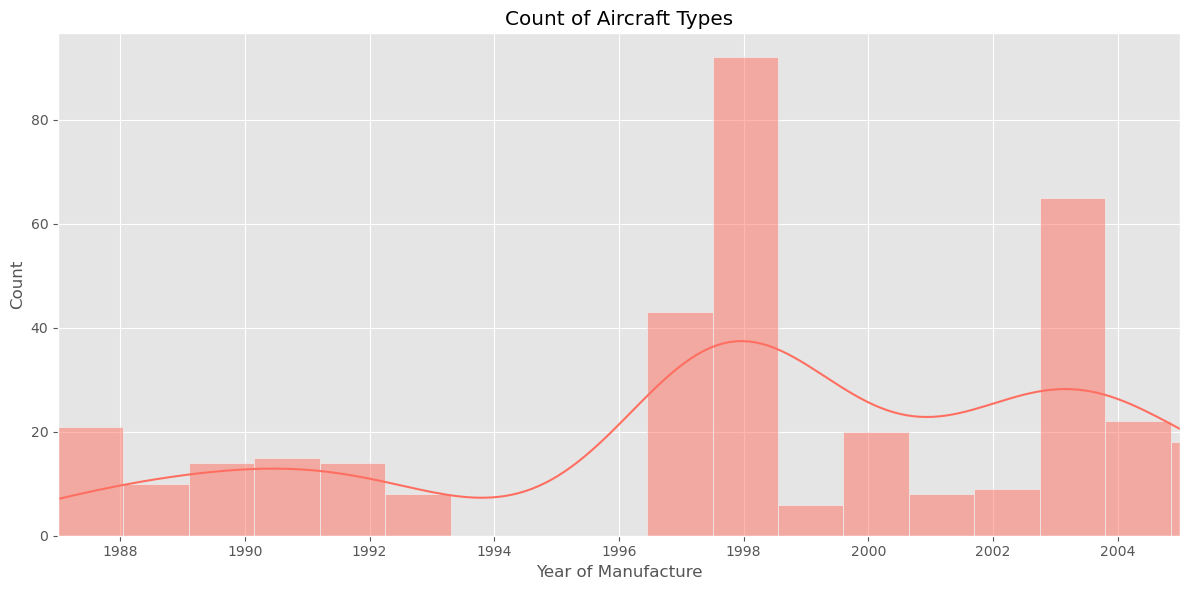

In [21]:
# Plot year of manufacture

plt.figure(figsize=(12, 6))
sns.histplot(data=df13, x='year', bins=20, kde=True, color='#FF6F61')
plt.title('Count of Aircraft Types')
plt.xlabel('Year of Manufacture')
plt.xlim(df13['year'].min(), 2005)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Aircraft Manufacture Year Distribution

The chart above shows the **distribution of aircraft counts by year of manufacture**, using a histogram with a KDE (Kernel Density Estimate) curve for smoothing.

### Key Observations:

- **1998** stands out with the **highest number of aircraft (~90)** manufactured that year.
- **2004** and **1997** also show significant numbers of aircraft, with over **60** and **40** respectively.
- A **minor peak** is seen around **1990–1991**, indicating some aircraft were also produced in those years.
- There is a **low count** of aircraft manufactured during **1993–1996** and **2001–2002**.
- **Very few aircraft** were produced in **1988–1989** and **post-2005** (capped at 2005 in this dataset).

### Conclusion:

The bulk of aircraft in this dataset were manufactured between **1997 and 2004**, with **1998** being the standout year. This implies that the operational fleet is relatively **older**, which could potentially have **maintenance or reliability implications** that affect flight operations such as delays or cancellations.


### Delay Reasons

In [35]:
query14 = '''
SELECT
  CONCAT(Origin, '-', Dest) AS routes,
  DelayType,
  AVG(AvgDelayMinutes) AS AvgDelayMinutes,
  SUM(IncidentCount) AS IncidentCount
FROM (
  SELECT Origin, Dest, 'CarrierDelay' AS DelayType,
         AVG(CarrierDelay) AS AvgDelayMinutes,
         COUNT(*) AS IncidentCount
  FROM flight_data
  WHERE 
       CarrierDelay > 0
       AND (Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
  GROUP BY Origin, Dest

  UNION ALL

  SELECT Origin, Dest, 'WeatherDelay',
         AVG(WeatherDelay),
         COUNT(*)
  FROM flight_data
  WHERE WeatherDelay > 0
       AND (Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
  GROUP BY Origin, Dest

  UNION ALL

  SELECT Origin, Dest, 'NASDelay',
         AVG(NASDelay),
         COUNT(*)
  FROM flight_data
  WHERE NASDelay > 0
       AND (Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
  GROUP BY Origin, Dest

  UNION ALL

  SELECT Origin, Dest, 'SecurityDelay',
         AVG(SecurityDelay),
         COUNT(*)
  FROM flight_data
  WHERE SecurityDelay > 0
       AND (Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
  GROUP BY Origin, Dest

  UNION ALL

  SELECT Origin, Dest, 'LateAircraftDelay',
         AVG(LateAircraftDelay),
         COUNT(*)
  FROM flight_data
  WHERE LateAircraftDelay > 0
       AND (Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
  GROUP BY Origin, Dest
) AS DelaySummary
GROUP BY CONCAT(Origin, '-', Dest), DelayType
ORDER BY AvgDelayMinutes DESC
'''

df14 = pull_data(query14)
df14

,routes,delaytype,avgdelayminutes,incidentcount
0,IAD-EWR,LateAircraftDelay,56.500000,44
1,IAD-EWR,NASDelay,47.702703,111
2,PHL-EWR,LateAircraftDelay,41.470588,51
3,PHL-EWR,CarrierDelay,38.200000,5
4,ATL-MSY,CarrierDelay,35.000000,15
5,PHL-EWR,NASDelay,34.586207,87
6,ATL-MSY,LateAircraftDelay,31.055556,18
7,IAD-EWR,CarrierDelay,27.000000,5
8,ATL-MSY,NASDelay,22.357143,14
9,IAD-EWR,WeatherDelay,17.500000,2


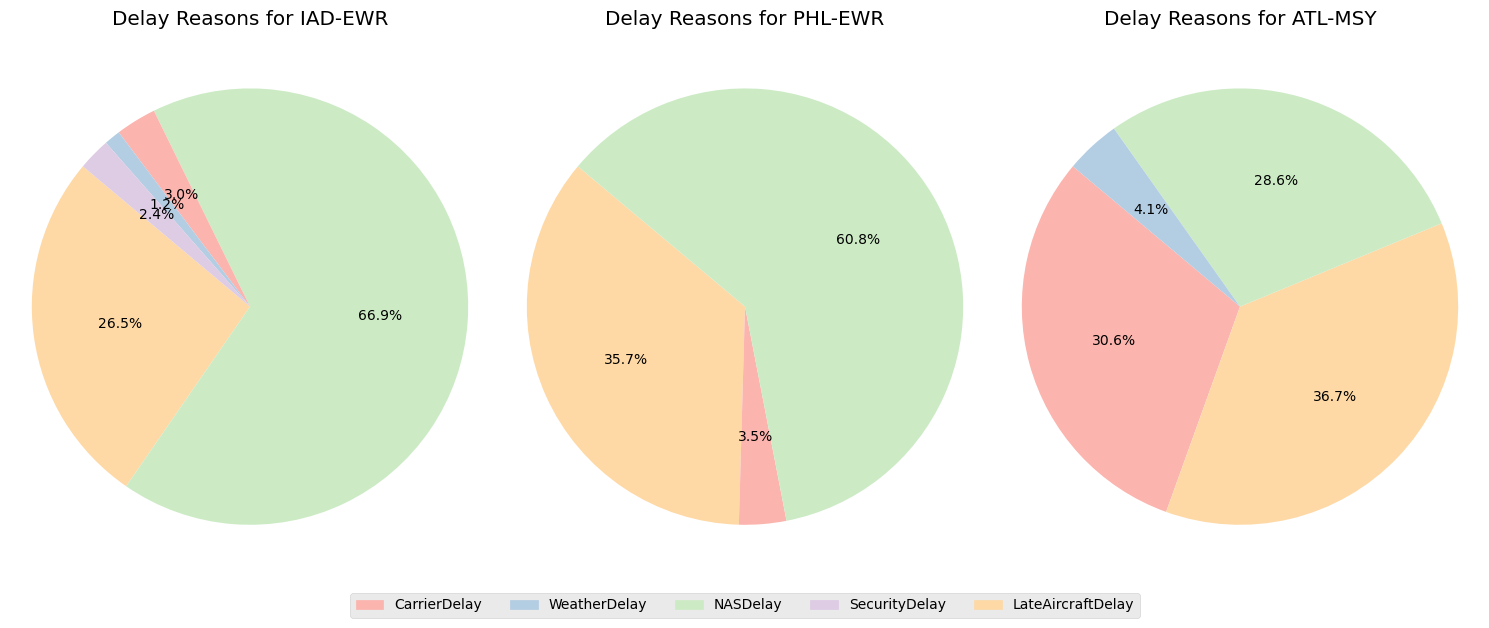

In [38]:
# Define delay reasons and assign Pastel1 colors

delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
pastel1_palette = sns.color_palette("Pastel1", n_colors=len(delay_reasons))
color_map = dict(zip(delay_reasons, pastel1_palette))

# Unique routes

unique_routes = df14['routes'].unique()

# Create subplots (1 row, as many columns as there are unique routes)

fig, ax = plt.subplots(figsize=(5 * len(unique_routes), 6), ncols=len(unique_routes), nrows=1)

# Plot pie chart for each route

for i, route in enumerate(unique_routes):
    route_data = df14[df14['routes'] == route]
    labels = route_data['delaytype']
    sizes = route_data['incidentcount']
    
    # Get colors for each label
    
    colors = [color_map.get(label, '#CCCCCC') for label in labels]
    
    ax[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
    ax[i].set_title(f'Delay Reasons for {route}')
    ax[i].axis('equal')  # Equal aspect ratio for circle

# Add a legend below the plots

legend_patches = [Patch(color=color_map[reason], label=reason) for reason in delay_reasons]
fig.legend(handles=legend_patches, loc='lower center', ncol=len(delay_reasons), bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()

## Delay Reasons by Route

The charts above show the **distribution of delay causes** for three major flight routes: **IAD-EWR**, **PHL-EWR**, and **ATL-MSY**, broken down into five FAA-defined categories:

- **Carrier Delay**
- **Weather Delay**
- **NAS Delay** (National Aviation System)
- **Security Delay**
- **Late Aircraft Delay**

### Key Observations:

#### **IAD-EWR**
- **NAS Delay** dominates, contributing to **66.9%** of delays.
- **Late Aircraft Delay** is the second most common, at **26.5%**.
- **Carrier Delay**, **Weather Delay**, and **Security Delay** are minimal, each below **3.5%**.

#### **PHL-EWR**
- Similar trend to IAD-EWR, with **NAS Delay** at **60.8%**.
- **Late Aircraft Delay** makes up **35.7%** of delays.
- **Carrier Delay** contributes **3.5%**, with **no recorded Weather or Security delays**.

#### **ATL-MSY**
- Shows a more **even distribution** of delay causes.
- **Late Aircraft Delay** leads at **36.7%**.
- **Carrier Delay** is close behind at **30.6%**.
- **NAS Delay** accounts for **28.6%**.
- **Weather Delay** is relatively higher at **4.1%**, compared to other routes.

### Conclusion:

- **IAD-EWR** and **PHL-EWR** routes are primarily impacted by **NAS-related delays**, which may stem from **air traffic control, airport capacity, or routing issues**.
- **ATL-MSY** faces a **more varied set of challenges**, including a notable impact from **Carrier** and **Weather** delays.
- These patterns can help inform **route-specific interventions**, whether through infrastructure improvements, scheduling optimization, or operational enhancements.


In [39]:
query15 = '''
SELECT
	CONCAT(Origin, '-', Dest) AS routes,
	CASE
		WHEN CancellationCode = "A" THEN "Carrier"
		WHEN CancellationCode = "B" THEN "Weather"
		WHEN CancellationCode = "C" THEN "NAS"
		WHEN CancellationCode = "D" THEN "Security"
		ELSE "Unknown"
	END AS cancellation_code,
	SUM(Cancelled) AS count_cancellation
FROM flight_data
WHERE
	(Origin, Dest) IN (('PHL', 'EWR'), ('ATL', 'MSY'), ('IAD', 'EWR'))
	AND FlightNum IN ('2344','1584','1212')
	AND Cancelled = 1
GROUP BY CONCAT(Origin, '-', Dest), CancellationCode
ORDER BY count_cancellation DESC
'''

df15 = pull_data(query15)
df15

,routes,cancellation_code,count_cancellation
0,PHL-EWR,NAS,48
1,IAD-EWR,NAS,40
2,ATL-MSY,Weather,24
3,PHL-EWR,Weather,8
4,IAD-EWR,Weather,6
5,ATL-MSY,NAS,4
6,ATL-MSY,Carrier,1
7,PHL-EWR,Carrier,1


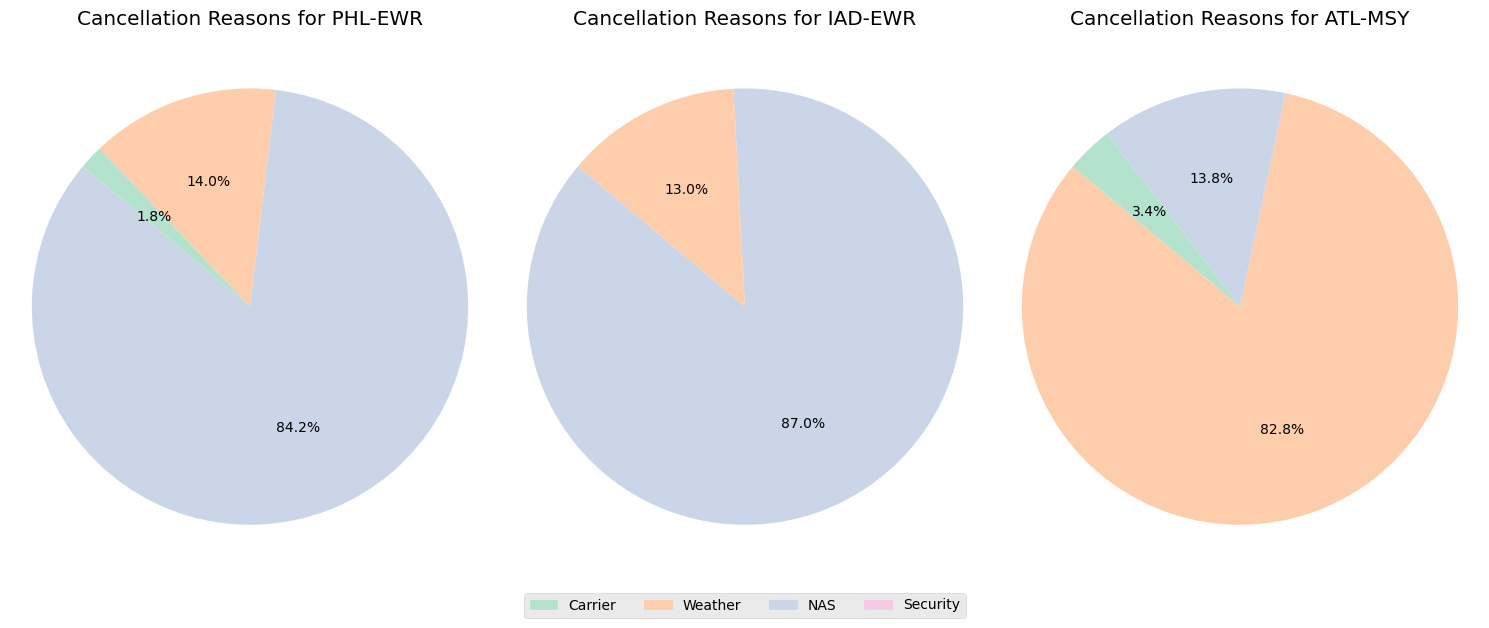

In [41]:
# Define cancellation reasons and assign Pastel2 colors

cancel_reasons = ['Carrier', 'Weather', 'NAS', 'Security']
pastel2_palette = sns.color_palette("Pastel2", n_colors=len(cancel_reasons))
color_map = dict(zip(cancel_reasons, pastel2_palette))

# Create subplots

fig, ax = plt.subplots(figsize=(15, 6), ncols=3, nrows=1)

# Plot pie charts for each route

for i, route in enumerate(df15['routes'].unique()):
    route_data = df15[df15['routes'] == route]
    labels = route_data['cancellation_code']
    sizes = route_data['count_cancellation']
    
    # Get colors for each label
    
    colors = [color_map.get(label, '#CCCCCC') for label in labels]
    
    ax[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
    ax[i].set_title(f'Cancellation Reasons for {route}')
    ax[i].axis('equal')

# Add a legend below the plots

legend_patches = [Patch(color=color_map[reason], label=reason) for reason in cancel_reasons]
fig.legend(handles=legend_patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()

## Cancellation Reasons by Route

The pie charts above illustrate the **proportional breakdown of flight cancellation reasons** for three major routes: **PHL-EWR**, **IAD-EWR**, and **ATL-MSY**. The causes are classified into four categories:

- **Carrier** (airline-related operational issues)
- **Weather** (extreme or unsafe weather conditions)
- **NAS** (National Aviation System issues such as air traffic control or congestion)
- **Security** (e.g., security breaches or alerts)

### Key Observations:

#### **PHL-EWR**
- **NAS-related issues** dominate with **84.2%** of cancellations.
- **Weather** accounts for **14.0%**.
- **Carrier** issues are minimal at **1.8%**.
- No recorded **Security** cancellations.

#### **IAD-EWR**
- Similar trend to PHL-EWR: **NAS** causes the bulk of cancellations (**87.0%**).
- **Weather** contributes **13.0%**.
- No **Carrier** or **Security**-related cancellations observed.

#### **ATL-MSY**
- **Weather** is the primary reason here, accounting for **82.8%** of cancellations — a stark contrast to the other two routes.
- **NAS** accounts for **13.8%**, and **Carrier** for **3.4%**.
- No **Security** issues reported.

### Conclusion:

- **PHL-EWR** and **IAD-EWR** are heavily affected by **NAS-related cancellations**, likely pointing to systemic issues such as congestion or ATC delays in the Northeast corridor.
- In contrast, **ATL-MSY** cancellations are **primarily weather-driven**, highlighting the impact of **regional meteorological patterns** on southern routes.
- These insights can guide **route-specific strategies** for mitigating cancellations, such as improved weather forecasting or NAS infrastructure investments.


## Conclusion:

This project, titled "Exploring Airline On-Time Performance: Analyzing Delays, Cancellations, and Predictive Factors for the Year 2005," provided a comprehensive analysis of airline performance using a substantial dataset comprising nearly 120 million records. The analysis focused on several key objectives: identifying delay patterns, understanding contributing factors, analyzing cancellations, and pinpointing problematic routes.

### Key Findings

1. **Delay Patterns**:
   - **Time of Day**: Evening flights exhibited the highest average delays, while morning flights were the most punctual. This suggests that peak travel hours contribute significantly to delays.
   - **Days of the Week**: Wednesdays showed the best on-time performance, while Mondays experienced the highest delays. This information can help travelers choose optimal days for flying.
   - **Seasonal Trends**: July and December were identified as months with the most delays, likely due to increased travel demand during holidays, whereas April and September had the best on-time performance.

2. **Delay Factors**:
   - The analysis ranked weather delays and late aircraft delays as the most significant contributors to overall delays. Carrier-related delays also played a notable role.
   - Understanding these factors enables airlines to target specific areas for operational improvements.

3. **Cancellation Analysis**:
   - Carrier and weather-related issues were the primary reasons for flight cancellations. Specific airlines, such as Atlantic Southeast Airlines, demonstrated higher cancellation rates, indicating operational challenges that could impact traveler decisions.
   - Weather was a significant factor for cancellations at certain airports, highlighting the need for robust weather management systems.

4. **Problematic Routes**:
   - Routes such as IAD to EWR and PHL to EWR consistently showed high rates of delays and cancellations, primarily due to NAS-related issues. This suggests potential systemic problems within air traffic management that could be addressed to improve performance.
   - Further analysis revealed that aircraft type and age might correlate with performance issues, emphasizing the importance of maintaining an efficient fleet.

### Implications for Stakeholders

The insights generated from this analysis provide valuable information for airlines, airport authorities, and travelers. Airlines can utilize this data to refine scheduling, improve operational efficiency, and enhance customer satisfaction. Airport authorities can focus on infrastructure improvements and better manage traffic flow during peak times. For travelers, understanding these patterns can inform better travel planning and decision-making.

### Future Work

Future analyses could expand on this work by incorporating more recent data, exploring the impact of external factors such as economic conditions or technological advancements in air travel. Additionally, developing predictive models to forecast delays and cancellations based on historical patterns could further enhance the travel experience.

In conclusion, this project highlights the complexity of airline operations and the myriad factors that influence on-time performance. By leveraging these insights, stakeholders can work collaboratively to enhance the efficiency and reliability of air travel.

### Dataset Reference:

The dataset used in this analysis was sourced from Kaggle. For more information, please visit the following link:

- Kaggle: [Data Expo 2009: Airline On-Time Data](https://www.kaggle.com/datasets/wenxingdi/data-expo-2009-airline-on-time-data/data)

# Thank You!

I would like to extend my heartfelt gratitude to everyone who contributed to this analysis and supported me throughout the process. Your insights, encouragement, and collaboration have been invaluable.